In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [5]:
dataset = pd.read_excel('sales.xlsx')

In [6]:
dataset.shape

(4520, 20)

In [7]:
dataset.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [9]:
dataset.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [10]:
pd.options.display.float_format = '{:.2f}'.format   
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.00,7002259.50,1304.96,7000000.00,7001129.75,7002259.50,7003389.25,7004519.00
AgentBonus,4520.00,4077.84,1403.32,1605.00,3027.75,3911.50,4867.25,9608.00
Age,4251.00,14.49,9.04,2.00,7.00,13.00,20.00,58.00
CustTenure,4294.00,14.47,8.96,2.00,7.00,13.00,20.00,57.00
ExistingProdType,4520.00,3.69,1.02,1.00,3.00,4.00,4.00,6.00
NumberOfPolicy,4475.00,3.57,1.46,1.00,2.00,4.00,5.00,6.00
MonthlyIncome,4284.00,22890.31,4885.60,16009.00,19683.50,21606.00,24725.00,38456.00
Complaint,4520.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00
ExistingPolicyTenure,4336.00,4.13,3.35,1.00,2.00,3.00,6.00,25.00
SumAssured,4366.00,619999.70,246234.82,168536.00,439443.25,578976.50,758236.00,1838496.00


In [11]:
dups = dataset.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
dataset[dups]

Number of duplicate rows = 0


,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore


In [12]:
dataset.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [13]:
dataset = dataset.drop(['CustID'], axis = 1)

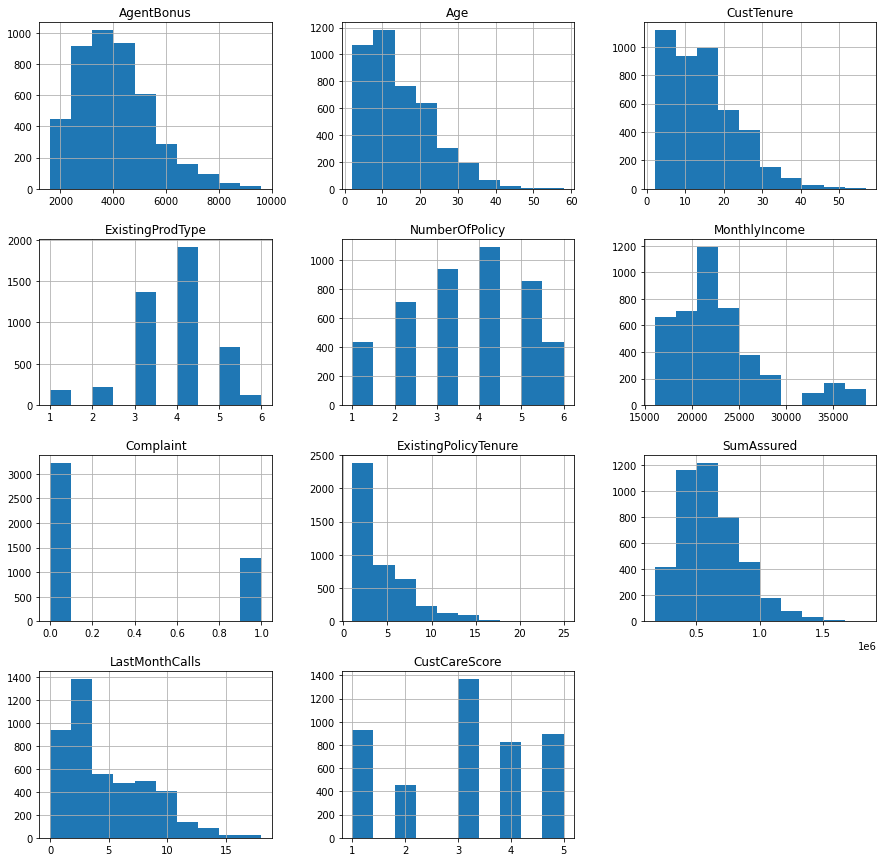

In [14]:
dataset.hist(figsize=(15,15));

<AxesSubplot: xlabel='Age'>

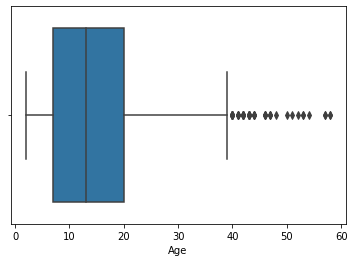

In [15]:
sns.boxplot(x = dataset.Age)

<AxesSubplot: xlabel='AgentBonus'>

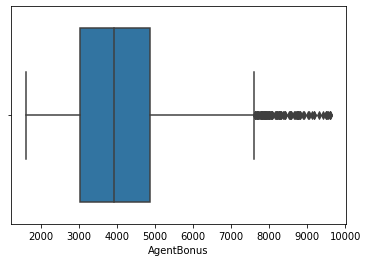

In [16]:
sns.boxplot(x = dataset.AgentBonus)

<AxesSubplot: xlabel='CustTenure'>

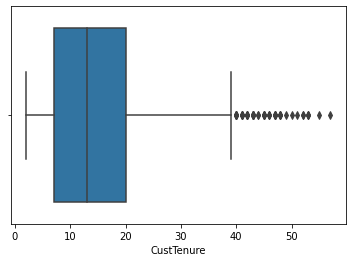

In [17]:
sns.boxplot(x = dataset.CustTenure)

<AxesSubplot: xlabel='NumberOfPolicy'>

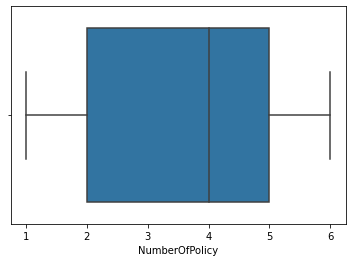

In [18]:
sns.boxplot(x = dataset.NumberOfPolicy)

<AxesSubplot: xlabel='ExistingProdType'>

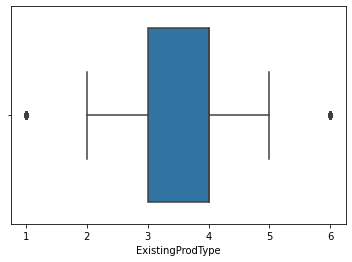

In [19]:
sns.boxplot(x = dataset.ExistingProdType)

<AxesSubplot: xlabel='MonthlyIncome'>

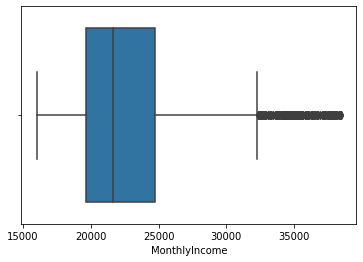

In [20]:
sns.boxplot(x = dataset.MonthlyIncome)

<AxesSubplot: xlabel='Complaint'>

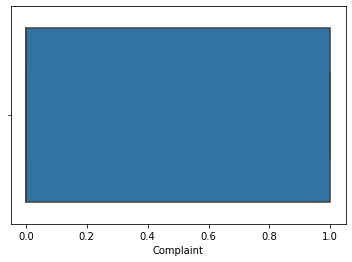

In [21]:
sns.boxplot(x = dataset.Complaint)

<AxesSubplot: xlabel='ExistingPolicyTenure'>

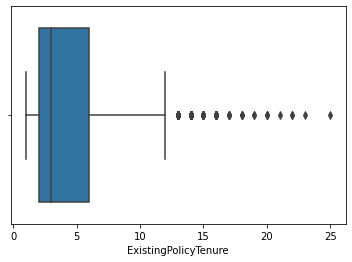

In [22]:
sns.boxplot(x = dataset.ExistingPolicyTenure)

<AxesSubplot: xlabel='SumAssured'>

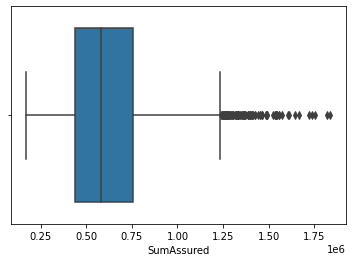

In [23]:
sns.boxplot(x = dataset.SumAssured)

<AxesSubplot: xlabel='CustCareScore'>

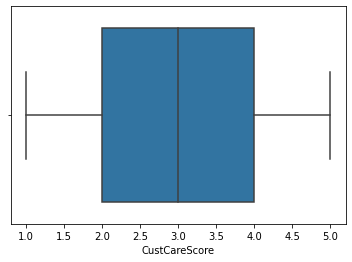

In [24]:
sns.boxplot(x = dataset.CustCareScore)

<AxesSubplot: >

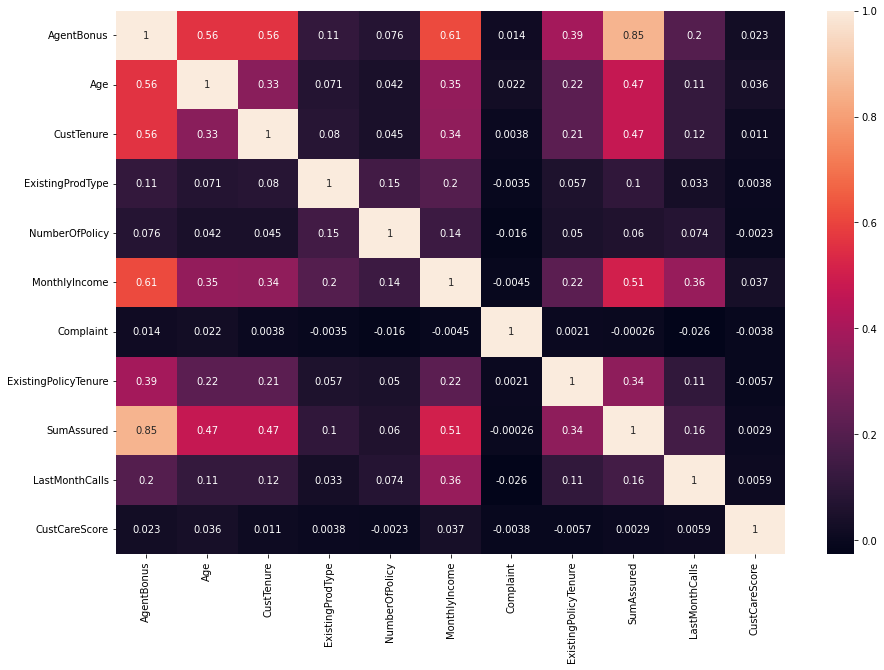

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot = True)

<AxesSubplot: xlabel='Channel', ylabel='count'>

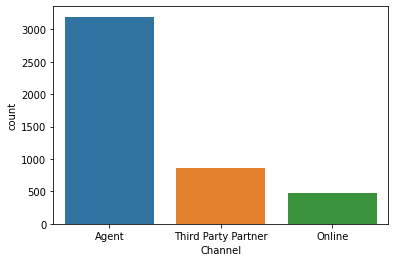

In [26]:
sns.countplot(x = dataset.Channel)

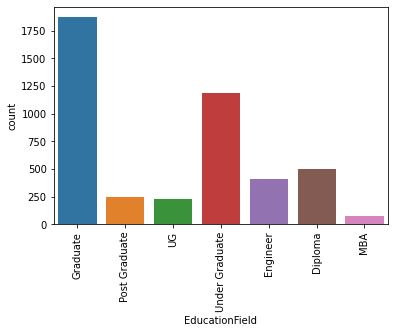

In [27]:
sns.countplot(x = dataset.EducationField)
plt.xticks(rotation=90);

<AxesSubplot: xlabel='Gender', ylabel='count'>

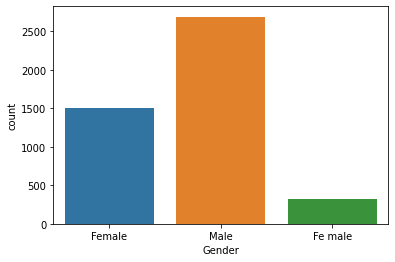

In [28]:
sns.countplot(x = dataset.Gender)

In [29]:
dataset.Gender.replace(to_replace= 'Fe male', value= 'Female', inplace= True)

<AxesSubplot: xlabel='Gender', ylabel='count'>

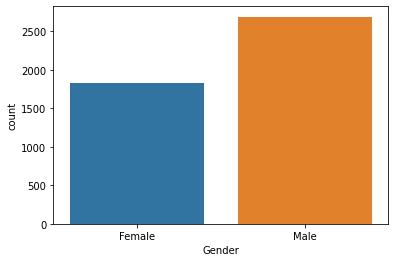

In [30]:
sns.countplot(x = dataset.Gender)

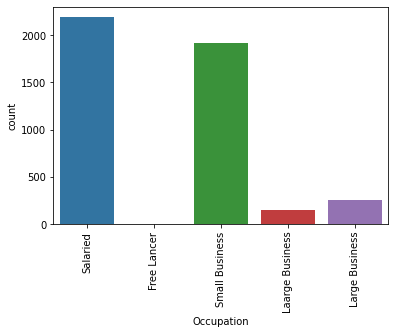

In [31]:
sns.countplot(x = dataset.Occupation)
plt.xticks(rotation=90);

In [32]:
dataset.Occupation.replace(to_replace= 'Laarge Business', value= 'Large Business', inplace= True)

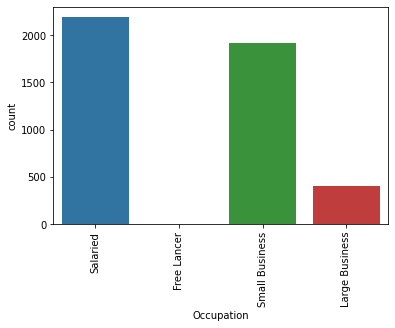

In [33]:
sns.countplot(x = dataset.Occupation)
plt.xticks(rotation=90);

<AxesSubplot: xlabel='ExistingProdType', ylabel='count'>

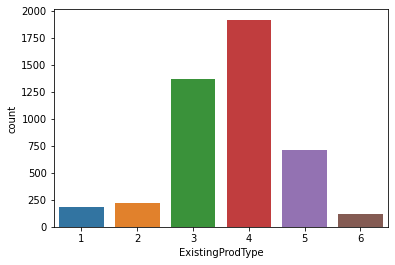

In [34]:
sns.countplot(x = dataset.ExistingProdType)

<AxesSubplot: xlabel='Designation', ylabel='count'>

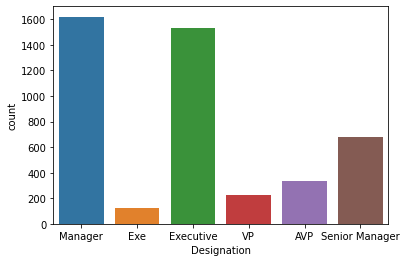

In [35]:
sns.countplot(x = dataset.Designation)

In [36]:
dataset.Designation.replace(to_replace= 'Exe', value= 'Executive', inplace= True)

<AxesSubplot: xlabel='Designation', ylabel='count'>

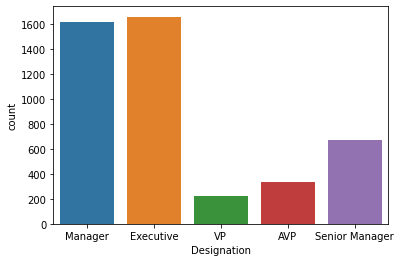

In [37]:
sns.countplot(x = dataset.Designation)

<AxesSubplot: xlabel='NumberOfPolicy', ylabel='count'>

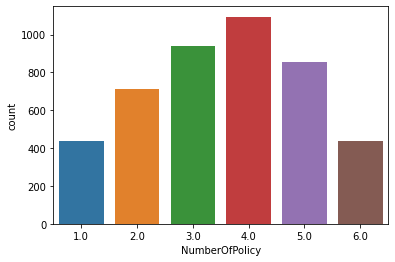

In [38]:
sns.countplot(x = dataset.NumberOfPolicy)

<AxesSubplot: xlabel='MaritalStatus', ylabel='count'>

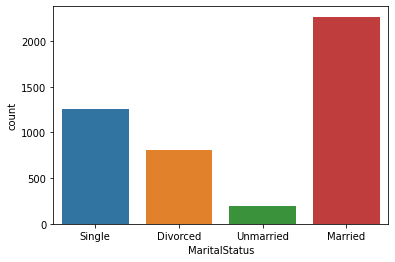

In [39]:
sns.countplot(x = dataset.MaritalStatus)

<AxesSubplot: xlabel='Zone', ylabel='count'>

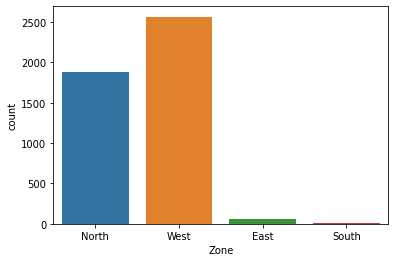

In [40]:
sns.countplot(x = dataset.Zone)

<AxesSubplot: xlabel='PaymentMethod', ylabel='count'>

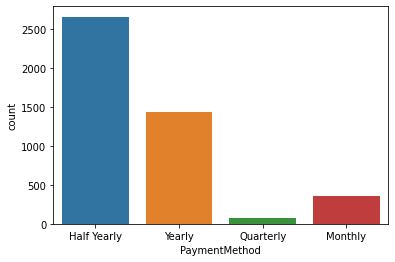

In [41]:
sns.countplot(x = dataset.PaymentMethod)

<Figure size 7200x7200 with 0 Axes>

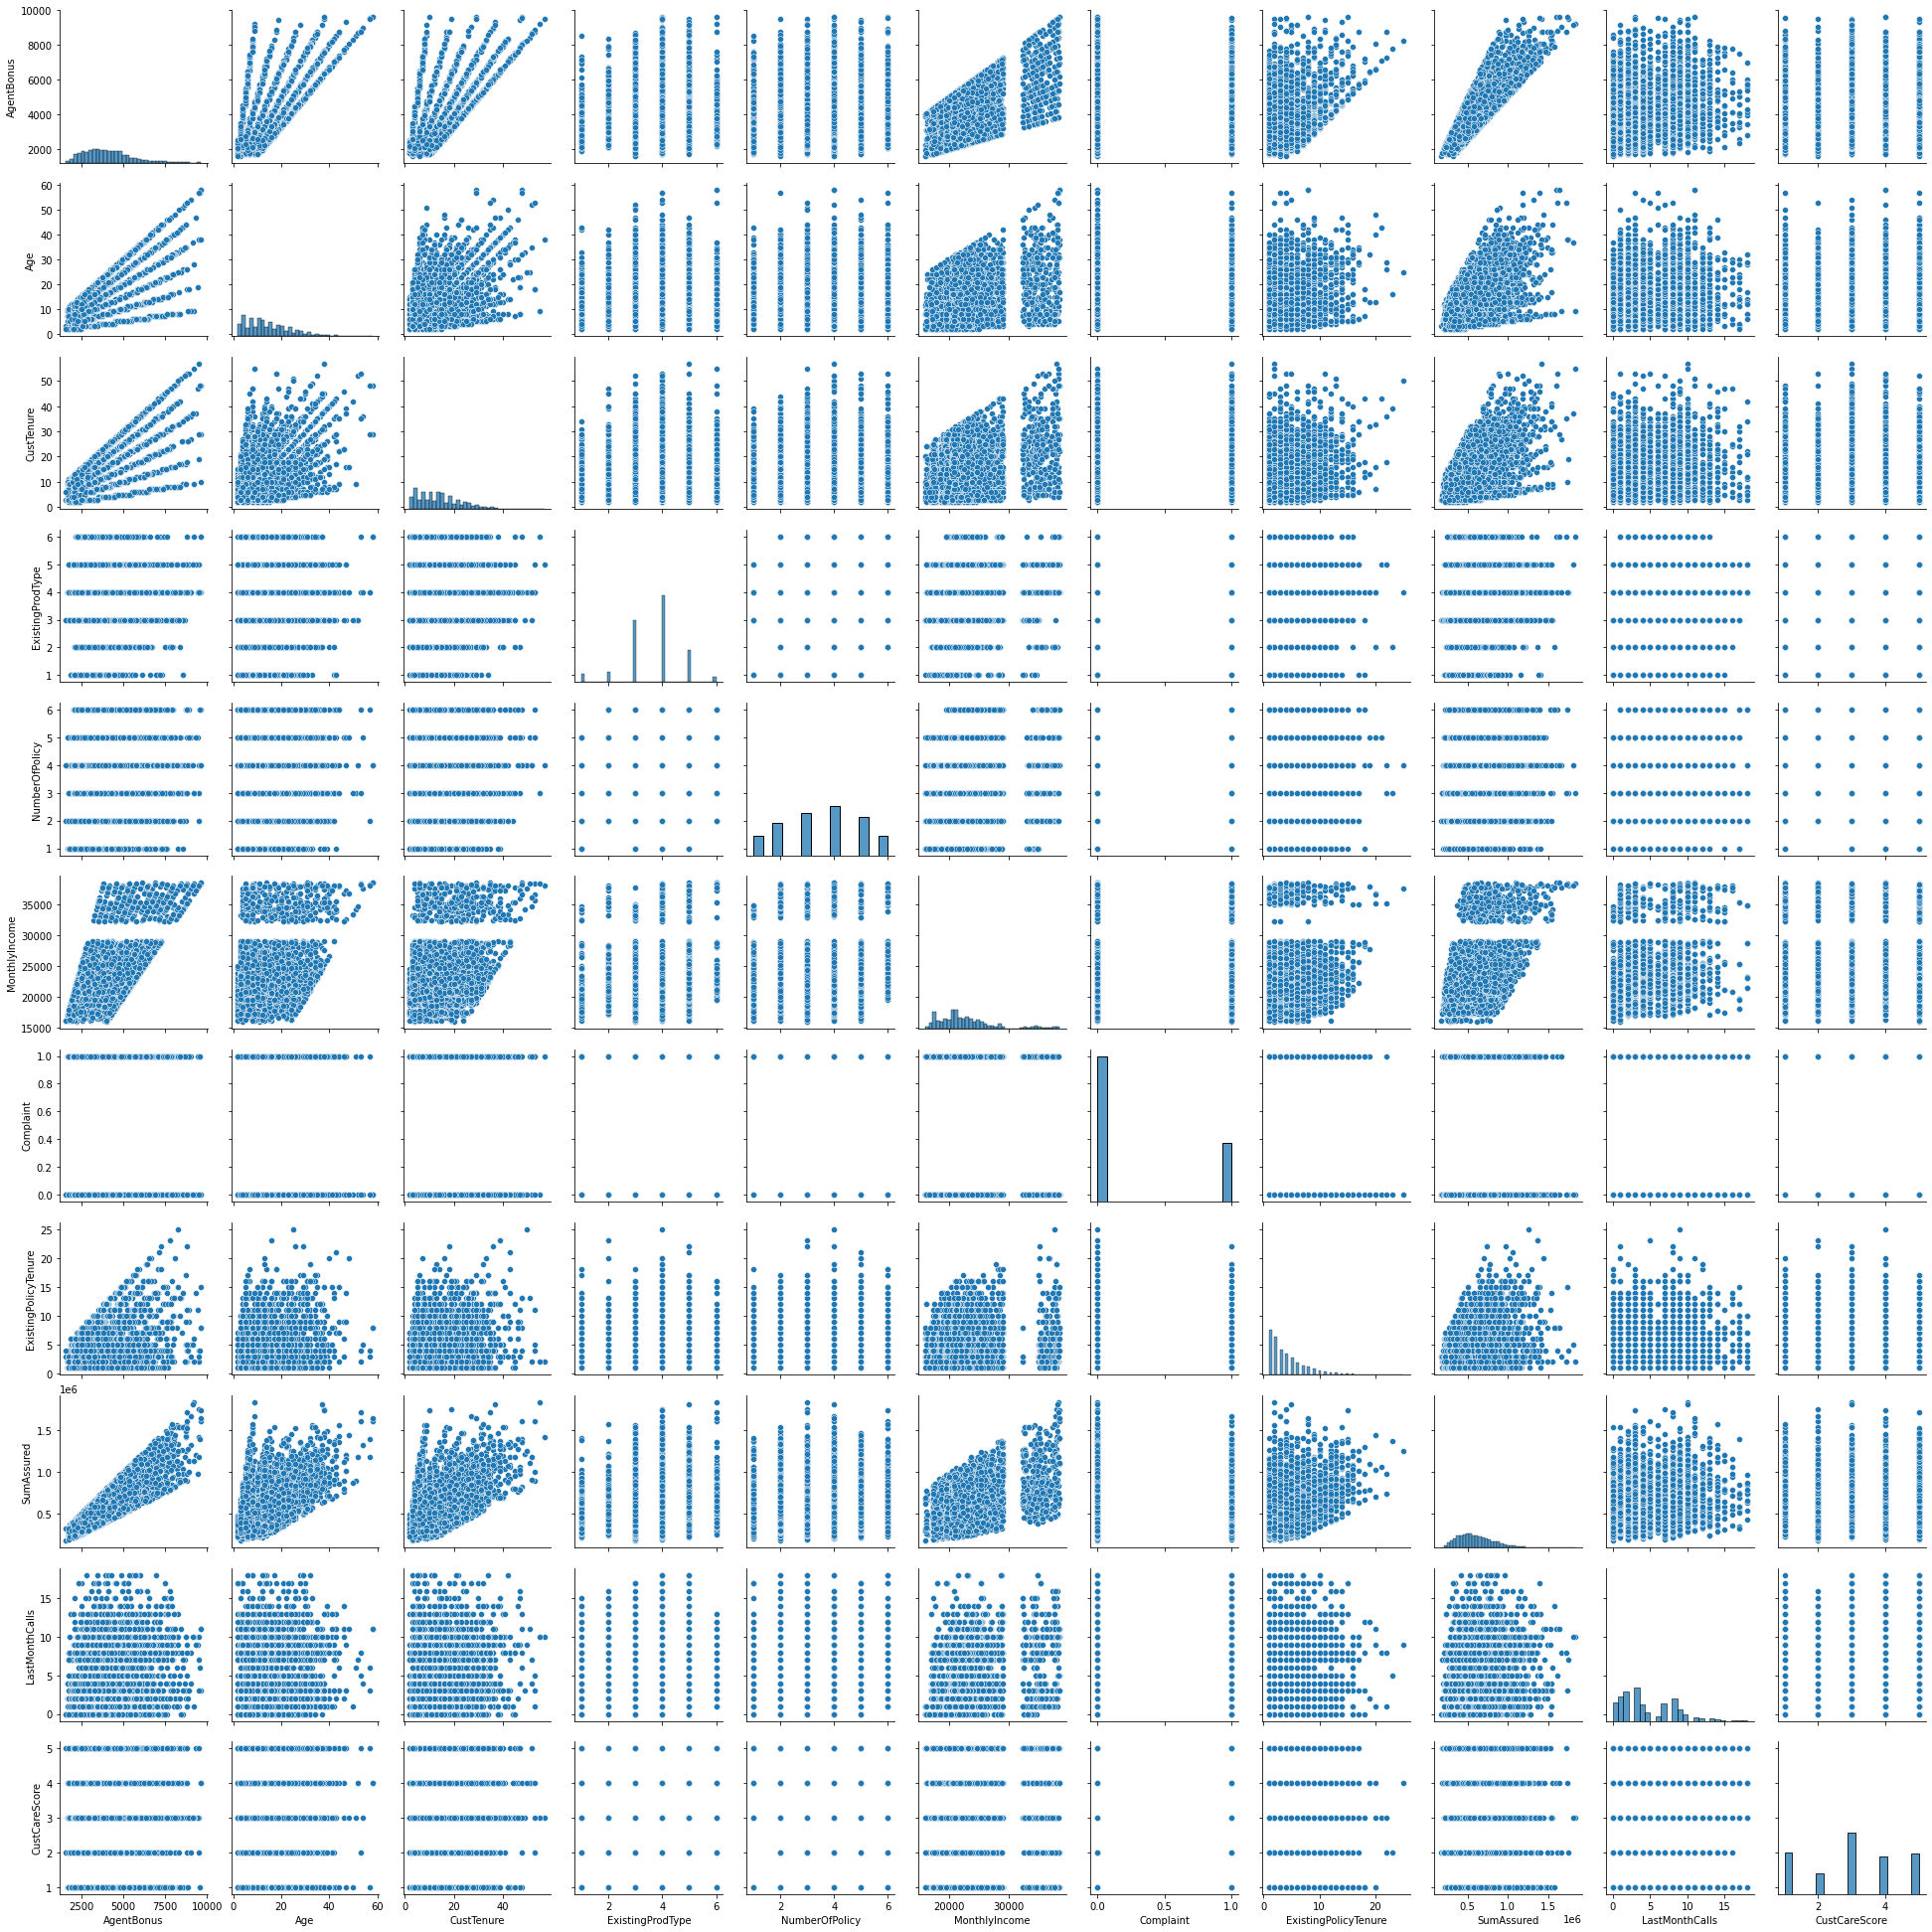

In [42]:
plt.figure(figsize=(100,100))
sns.pairplot(dataset);

In [43]:
# dataset.to_excel('111.xlsx')

In [44]:
dataset.Channel.value_counts(normalize = True)

Agent                 0.71
Third Party Partner   0.19
Online                0.10
Name: Channel, dtype: float64

In [45]:
dataset.EducationField.value_counts(normalize = True)

Graduate         0.41
Under Graduate   0.26
Diploma          0.11
Engineer         0.09
Post Graduate    0.06
UG               0.05
MBA              0.02
Name: EducationField, dtype: float64

In [46]:
dataset.Gender.value_counts(normalize = True)

Male     0.59
Female   0.41
Name: Gender, dtype: float64

In [47]:
dataset.Occupation.value_counts(normalize = True)

Salaried         0.48
Small Business   0.42
Large Business   0.09
Free Lancer      0.00
Name: Occupation, dtype: float64

In [48]:
dataset.ExistingProdType.value_counts(normalize = True)

4   0.42
3   0.30
5   0.16
2   0.05
1   0.04
6   0.03
Name: ExistingProdType, dtype: float64

In [49]:
dataset.Designation.value_counts(normalize = True)

Executive        0.37
Manager          0.36
Senior Manager   0.15
AVP              0.07
VP               0.05
Name: Designation, dtype: float64

In [50]:
dataset.NumberOfPolicy.value_counts(normalize = True)

4.00   0.24
3.00   0.21
5.00   0.19
2.00   0.16
1.00   0.10
6.00   0.10
Name: NumberOfPolicy, dtype: float64

In [51]:
dataset.MaritalStatus.value_counts(normalize = True)

Married     0.50
Single      0.28
Divorced    0.18
Unmarried   0.04
Name: MaritalStatus, dtype: float64

In [52]:
dataset.Zone.value_counts(normalize = True)

West    0.57
North   0.42
East    0.01
South   0.00
Name: Zone, dtype: float64

In [53]:
dataset.PaymentMethod.value_counts(normalize = True)

Half Yearly   0.59
Yearly        0.32
Monthly       0.08
Quarterly     0.02
Name: PaymentMethod, dtype: float64

In [57]:
dataset.Age.replace(to_replace= np.NaN, value= dataset["Age"].mode()[0], inplace= True)

In [58]:
dataset.CustTenure.replace(to_replace= np.NaN, value= dataset["CustTenure"].mode()[0], inplace= True)

In [59]:
dataset.NumberOfPolicy.replace(to_replace= np.NaN, value= dataset["NumberOfPolicy"].mode()[0], inplace= True)

In [60]:
dataset.MonthlyIncome.replace(to_replace= np.NaN, value= dataset["MonthlyIncome"].mean(), inplace= True)

In [61]:
dataset.ExistingPolicyTenure.replace(to_replace= np.NaN, value= dataset["ExistingPolicyTenure"].mode()[0], inplace= True)

In [62]:
dataset.SumAssured.replace(to_replace= np.NaN, value= dataset["SumAssured"].mean(), inplace= True)

In [63]:
dataset.CustCareScore.replace(to_replace= np.NaN, value= dataset["CustCareScore"].mode()[0], inplace= True)

In [64]:
dataset.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [65]:
dataset1 = dataset.copy()

In [66]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [67]:
datasetoutlier = dataset1.copy()

In [68]:
for column in dataset1[['Age', 'CustTenure', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured','AgentBonus']]:
    lr,ur= remove_outlier(dataset1[column])
    dataset1[column]=np.where(dataset1[column]>ur,ur,dataset1[column])
    dataset1[column]=np.where(dataset1[column]<lr,lr,dataset1[column])

In [69]:
# One hot encoding of logical variables
dataset1 = pd.get_dummies(dataset1, columns = ['Channel', 'EducationField','Gender','Designation','MaritalStatus','Zone','PaymentMethod','Occupation','ExistingProdType'])

In [70]:
dataset1.head()

,AgentBonus,Age,CustTenure,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,ExistingProdType_1,ExistingProdType_2,ExistingProdType_3,ExistingProdType_4,ExistingProdType_5,ExistingProdType_6
0,4409.00,22.00,4.00,2.00,20993.00,1,2.00,806761.00,5,2.00,...,0,0,1,0,0,0,1,0,0,0
1,2214.00,11.00,2.00,4.00,20130.00,0,3.00,294502.00,7,3.00,...,0,0,1,0,0,0,0,1,0,0
2,4273.00,26.00,4.00,3.00,17090.00,1,2.00,619999.70,0,3.00,...,1,0,0,0,0,0,0,1,0,0
3,1791.00,11.00,4.00,3.00,17909.00,1,2.00,268635.00,0,5.00,...,0,0,1,0,0,0,1,0,0,0
4,2955.00,6.00,4.00,4.00,18468.00,0,4.00,366405.00,2,5.00,...,0,0,0,1,0,0,1,0,0,0


In [71]:
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
AgentBonus,4520.00,4062.77,1358.28,1605.00,3027.75,3911.50,4867.25,7626.50
Age,4520.00,13.86,8.80,2.00,6.00,12.00,19.00,38.50
CustTenure,4520.00,13.87,8.77,2.00,6.00,12.00,19.00,38.50
NumberOfPolicy,4520.00,3.57,1.45,1.00,2.00,4.00,5.00,6.00
MonthlyIncome,4520.00,22574.03,3948.15,16009.00,19858.00,21877.00,24531.75,31542.38
Complaint,4520.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00
ExistingPolicyTenure,4520.00,3.88,2.95,1.00,1.00,3.00,5.00,11.00
SumAssured,4520.00,615902.26,229255.42,168536.00,444476.25,590012.50,750010.50,1208311.88
LastMonthCalls,4520.00,4.63,3.62,0.00,2.00,3.00,8.00,18.00
CustCareScore,4520.00,3.07,1.38,1.00,2.00,3.00,4.00,5.00


### Model building

In [72]:
datasetLR = dataset1.copy()

In [73]:
datasetLR

,AgentBonus,Age,CustTenure,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,ExistingProdType_1,ExistingProdType_2,ExistingProdType_3,ExistingProdType_4,ExistingProdType_5,ExistingProdType_6
0,4409.00,22.00,4.00,2.00,20993.00,1,2.00,806761.00,5,2.00,...,0,0,1,0,0,0,1,0,0,0
1,2214.00,11.00,2.00,4.00,20130.00,0,3.00,294502.00,7,3.00,...,0,0,1,0,0,0,0,1,0,0
2,4273.00,26.00,4.00,3.00,17090.00,1,2.00,619999.70,0,3.00,...,1,0,0,0,0,0,0,1,0,0
3,1791.00,11.00,4.00,3.00,17909.00,1,2.00,268635.00,0,5.00,...,0,0,1,0,0,0,1,0,0,0
4,2955.00,6.00,4.00,4.00,18468.00,0,4.00,366405.00,2,5.00,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,3953.00,4.00,8.00,2.00,26355.00,0,2.00,636473.00,9,1.00,...,0,0,0,1,0,0,0,1,0,0
4516,2939.00,9.00,9.00,2.00,20991.00,0,3.00,296813.00,1,3.00,...,0,0,1,0,0,1,0,0,0,0
4517,3792.00,23.00,23.00,5.00,22890.31,0,2.00,667371.00,4,1.00,...,0,0,1,0,0,0,0,0,1,0
4518,4816.00,10.00,10.00,2.00,20068.00,0,6.00,943999.00,1,5.00,...,0,0,0,1,0,0,0,1,0,0


In [74]:
datasetLR.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome',
       'Complaint', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls',
       'CustCareScore', 'Channel_Agent', 'Channel_Online',
       'Channel_Third Party Partner', 'EducationField_Diploma',
       'EducationField_Engineer', 'EducationField_Graduate',
       'EducationField_MBA', 'EducationField_Post Graduate',
       'EducationField_UG', 'EducationField_Under Graduate', 'Gender_Female',
       'Gender_Male', 'Designation_AVP', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Zone_East',
       'Zone_North', 'Zone_South', 'Zone_West', 'PaymentMethod_Half Yearly',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly', 'Occupation_Free Lancer',
       'Occupation_Large Business', 'Occupation_Salaried',

In [75]:
# One of the variables from one hot encoding removed 
datasetLR = datasetLR.drop(['Channel_Third Party Partner','EducationField_Under Graduate','Gender_Male','Designation_VP','MaritalStatus_Unmarried','Zone_West','PaymentMethod_Yearly','Occupation_Small Business','ExistingProdType_5'], axis = 1)

In [76]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_datasetLR = pd.DataFrame(scaler.fit_transform(datasetLR), columns = datasetLR.columns)

In [77]:
scaled_datasetLR

,AgentBonus,Age,CustTenure,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,PaymentMethod_Monthly,PaymentMethod_Quarterly,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,ExistingProdType_1,ExistingProdType_2,ExistingProdType_3,ExistingProdType_4,ExistingProdType_6
0,0.25,0.93,-1.13,-1.08,-0.40,1.58,-0.64,0.83,0.10,-0.78,...,-0.29,-0.13,-0.02,-0.31,1.03,-0.21,-0.23,1.52,-0.86,-0.17
1,-1.36,-0.32,-1.35,0.30,-0.62,-0.63,-0.30,-1.40,0.66,-0.05,...,-0.29,-0.13,-0.02,-0.31,1.03,-0.21,-0.23,-0.66,1.17,-0.17
2,0.15,1.38,-1.13,-0.39,-1.39,1.58,-0.64,0.02,-1.28,-0.05,...,-0.29,-0.13,47.53,-0.31,-0.97,-0.21,-0.23,-0.66,1.17,-0.17
3,-1.67,-0.32,-1.13,-0.39,-1.18,1.58,-0.64,-1.51,-1.28,1.41,...,-0.29,-0.13,-0.02,-0.31,1.03,-0.21,-0.23,1.52,-0.86,-0.17
4,-0.82,-0.89,-1.13,0.30,-1.04,-0.63,0.04,-1.09,-0.73,1.41,...,-0.29,-0.13,-0.02,-0.31,-0.97,-0.21,-0.23,1.52,-0.86,-0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-0.08,-1.12,-0.67,-1.08,0.96,-0.63,-0.64,0.09,1.21,-1.50,...,-0.29,-0.13,-0.02,-0.31,-0.97,-0.21,-0.23,-0.66,1.17,-0.17
4516,-0.83,-0.55,-0.56,-1.08,-0.40,-0.63,-0.30,-1.39,-1.00,-0.05,...,-0.29,-0.13,-0.02,-0.31,1.03,-0.21,4.41,-0.66,-0.86,-0.17
4517,-0.20,1.04,1.04,0.99,0.08,-0.63,-0.64,0.22,-0.17,-1.50,...,-0.29,-0.13,-0.02,-0.31,1.03,-0.21,-0.23,-0.66,-0.86,-0.17
4518,0.55,-0.44,-0.44,-1.08,-0.63,-0.63,0.72,1.43,-1.00,1.41,...,-0.29,-0.13,-0.02,-0.31,-0.97,-0.21,-0.23,-0.66,1.17,-0.17


In [78]:
# Removing CATEGORICAL VARIABLES FOR VIF CHECKING
scaled_datasetLR_X = scaled_datasetLR.drop(['AgentBonus','Channel_Agent', 'Channel_Online',
        'EducationField_Diploma',
       'EducationField_Engineer', 'EducationField_Graduate',
       'EducationField_MBA', 'EducationField_Post Graduate',
       'EducationField_UG', 'Gender_Female',
       'Designation_AVP', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Zone_East',
       'Zone_North', 'Zone_South',  'PaymentMethod_Half Yearly',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
        'Occupation_Free Lancer',
        'Occupation_Large Business',
       'Occupation_Salaried',
       'ExistingProdType_1', 'ExistingProdType_2', 'ExistingProdType_3',
       'ExistingProdType_4', 'ExistingProdType_6'], axis = 1)

scaled_datasetLR_Y = scaled_datasetLR['AgentBonus']

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    #calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
    return(vif)

In [80]:
calc_vif(scaled_datasetLR_X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
6,SumAssured,1.69
3,MonthlyIncome,1.52
0,Age,1.37
1,CustTenure,1.36
7,LastMonthCalls,1.15
5,ExistingPolicyTenure,1.09
2,NumberOfPolicy,1.02
8,CustCareScore,1.00
4,Complaint,1.00


In [81]:
X= scaled_datasetLR.drop(['AgentBonus'], axis = 1)

In [82]:
y = scaled_datasetLR_Y.copy()

In [83]:
X = sm.add_constant(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

In [85]:
model1 = sm.OLS(y_train,X_train).fit()
model1

In [86]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     319.1
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:22   Log-Likelihood:                -1940.2
No. Observations:                3164   AIC:                             3960.
Df Residuals:                    3124   BIC:                             4203.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0010      0.008      0.124      0.901      -0.015       0.017
Age                              0.1364      0.010     14.343      0.000       0.118       0.155
CustTenure                       0.1503      0.009     16.053      0.000       0.132       0.169
NumberOfPolicy                  -0.0065      0.009     -0.768      0.442      -0.023       0.010
MonthlyIncome                    0.1134      0.018      6.273      0.000       0.078       0.149
Complaint                        0.0115      0.008      1.431      0.153      -0.004       0.027
ExistingPolicyTenure             0.0822      0.008      9.751      0.000       0.066       0.099
SumAssured                       0.5890      0.011     55.621      0.000       0.568       0.610
LastMonthCalls                  -0.0093      0.009     -1.061      0.289      -0.026       0.008
CustCareScore                    0.0005      0.008      0.068      0.946      -0.015       0.016
Channel_Agent                    0.0004      0.009      0.040      0.968      -0.018       0.019
Channel_Online                   0.0110      0.010      1.151      0.250      -0.008       0.030
EducationField_Diploma           0.0015      0.009      0.161      0.872      -0.017       0.020
EducationField_Engineer         -0.0206      0.037     -0.555      0.579      -0.093       0.052
EducationField_Graduate         -0.0151      0.035     -0.436      0.663      -0.083       0.053
EducationField_MBA               0.0015      0.012      0.120      0.905      -0.023       0.026
EducationField_Post Graduate    -0.0169      0.018     -0.946      0.344      -0.052       0.018
EducationField_UG                0.0192      0.009      2.110      0.035       0.001       0.037
Gender_Female                   -0.0040      0.008     -0.495      0.621      -0.020       0.012
Designation_AVP                 -0.0067      0.013     -0.519      0.604      -0.032       0.019
Designation_Executive           -0.1636      0.032     -5.087      0.000      -0.227      -0.101
Designation_Manager             -0.1790      0.027     -6.530      0.000      -0.233      -0.125
Designation_Senior Manager      -0.0918      0.018     -5.158      0.000      -0.127      -0.057
MaritalStatus_Divorced           0.0430      0.017      2.511      0.012       0.009       0.077
MaritalStatus_Married            0.0401      0.021      1.906      0.057      -0.001       0.081
MaritalStatus_Single             0.0569      0.019      2.929      0.003       0.019       0.095
Zone_East                        0.0014      0.008      0.174      0.862      -0.014       0.017
Zone_North                       0.0010      0.008      0.125      0.901      -0.015       0.017
Zone_South                       0.0062      0.008      0.755      0.450    

In [87]:
X = X.drop(['CustCareScore'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model2 = sm.OLS(y_train,X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     327.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:37   Log-Likelihood:                -1940.2
No. Observations:                3164   AIC:                             3958.
Df Residuals:                    3125   BIC:                             4195.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0010      0.008      0.123      0.902      -0.015       0.017
Age                              0.1364      0.010     14.351      0.000       0.118       0.155
CustTenure                       0.1503      0.009     16.056      0.000       0.132       0.169
NumberOfPolicy                  -0.0066      0.009     -0.770      0.442      -0.023       0.010
MonthlyIncome                    0.1135      0.018      6.278      0.000       0.078       0.149
Complaint                        0.0115      0.008      1.430      0.153      -0.004       0.027
ExistingPolicyTenure             0.0822      0.008      9.753      0.000       0.066       0.099
SumAssured                       0.5890      0.011     55.641      0.000       0.568       0.610
LastMonthCalls                  -0.0093      0.009     -1.062      0.288      -0.026       0.008
Channel_Agent                    0.0004      0.009      0.037      0.970      -0.018       0.019
Channel_Online                   0.0109      0.010      1.149      0.251      -0.008       0.030
EducationField_Diploma           0.0015      0.009      0.162      0.871      -0.017       0.020
EducationField_Engineer         -0.0207      0.037     -0.556      0.578      -0.093       0.052
EducationField_Graduate         -0.0151      0.035     -0.435      0.663      -0.083       0.053
EducationField_MBA               0.0015      0.012      0.119      0.905      -0.023       0.025
EducationField_Post Graduate    -0.0169      0.018     -0.945      0.345      -0.052       0.018
EducationField_UG                0.0192      0.009      2.111      0.035       0.001       0.037
Gender_Female                   -0.0040      0.008     -0.494      0.622      -0.020       0.012
Designation_AVP                 -0.0067      0.013     -0.517      0.605      -0.032       0.019
Designation_Executive           -0.1636      0.032     -5.087      0.000      -0.227      -0.101
Designation_Manager             -0.1790      0.027     -6.531      0.000      -0.233      -0.125
Designation_Senior Manager      -0.0918      0.018     -5.159      0.000      -0.127      -0.057
MaritalStatus_Divorced           0.0431      0.017      2.513      0.012       0.009       0.077
MaritalStatus_Married            0.0401      0.021      1.906      0.057      -0.001       0.081
MaritalStatus_Single             0.0569      0.019      2.929      0.003       0.019       0.095
Zone_East                        0.0014      0.008      0.172      0.863      -0.014       0.017
Zone_North                       0.0010      0.008      0.122      0.903      -0.015       0.017
Zone_South                       0.0062      0.008      0.756      0.450      -0.010       0.022
PaymentMethod_Half Yearly        0.0208      0.014      1.472      0.141    

In [88]:
X = X.drop(['Channel_Agent'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model3 = sm.OLS(y_train,X_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     336.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:39   Log-Likelihood:                -1940.2
No. Observations:                3164   AIC:                             3956.
Df Residuals:                    3126   BIC:                             4187.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0010      0.008      0.123      0.902      -0.015       0.017
Age                              0.1364      0.010     14.354      0.000       0.118       0.155
CustTenure                       0.1503      0.009     16.063      0.000       0.132       0.169
NumberOfPolicy                  -0.0065      0.009     -0.769      0.442      -0.023       0.010
MonthlyIncome                    0.1135      0.018      6.280      0.000       0.078       0.149
Complaint                        0.0115      0.008      1.430      0.153      -0.004       0.027
ExistingPolicyTenure             0.0822      0.008      9.758      0.000       0.066       0.099
SumAssured                       0.5890      0.011     55.653      0.000       0.568       0.610
LastMonthCalls                  -0.0093      0.009     -1.064      0.287      -0.026       0.008
Channel_Online                   0.0108      0.008      1.327      0.185      -0.005       0.027
EducationField_Diploma           0.0015      0.009      0.162      0.871      -0.017       0.020
EducationField_Engineer         -0.0206      0.037     -0.556      0.578      -0.093       0.052
EducationField_Graduate         -0.0151      0.035     -0.437      0.662      -0.083       0.053
EducationField_MBA               0.0015      0.012      0.118      0.906      -0.023       0.025
EducationField_Post Graduate    -0.0169      0.018     -0.946      0.344      -0.052       0.018
EducationField_UG                0.0192      0.009      2.112      0.035       0.001       0.037
Gender_Female                   -0.0040      0.008     -0.495      0.621      -0.020       0.012
Designation_AVP                 -0.0067      0.013     -0.517      0.605      -0.032       0.019
Designation_Executive           -0.1636      0.032     -5.088      0.000      -0.227      -0.101
Designation_Manager             -0.1790      0.027     -6.533      0.000      -0.233      -0.125
Designation_Senior Manager      -0.0918      0.018     -5.161      0.000      -0.127      -0.057
MaritalStatus_Divorced           0.0431      0.017      2.513      0.012       0.009       0.077
MaritalStatus_Married            0.0401      0.021      1.906      0.057      -0.001       0.081
MaritalStatus_Single             0.0569      0.019      2.929      0.003       0.019       0.095
Zone_East                        0.0014      0.008      0.172      0.864      -0.014       0.017
Zone_North                       0.0010      0.008      0.122      0.903      -0.015       0.017
Zone_South                       0.0062      0.008      0.757      0.449      -0.010       0.022
PaymentMethod_Half Yearly        0.0207      0.014      1.472      0.141      -0.007       0.048
PaymentMethod_Monthly            0.0072      0.026      0.274      0.784    

In [89]:
X = X.drop(['Zone_North'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model4 = sm.OLS(y_train,X_train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     346.0
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:40   Log-Likelihood:                -1940.2
No. Observations:                3164   AIC:                             3954.
Df Residuals:                    3127   BIC:                             4179.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0010      0.008      0.124      0.901      -0.015       0.017
Age                              0.1364      0.009     14.361      0.000       0.118       0.155
CustTenure                       0.1503      0.009     16.067      0.000       0.132       0.169
NumberOfPolicy                  -0.0065      0.009     -0.765      0.445      -0.023       0.010
MonthlyIncome                    0.1135      0.018      6.281      0.000       0.078       0.149
Complaint                        0.0115      0.008      1.431      0.153      -0.004       0.027
ExistingPolicyTenure             0.0822      0.008      9.764      0.000       0.066       0.099
SumAssured                       0.5891      0.011     55.693      0.000       0.568       0.610
LastMonthCalls                  -0.0093      0.009     -1.063      0.288      -0.026       0.008
Channel_Online                   0.0108      0.008      1.331      0.183      -0.005       0.027
EducationField_Diploma           0.0015      0.009      0.163      0.871      -0.017       0.020
EducationField_Engineer         -0.0206      0.037     -0.554      0.580      -0.093       0.052
EducationField_Graduate         -0.0151      0.035     -0.435      0.663      -0.083       0.053
EducationField_MBA               0.0014      0.012      0.117      0.907      -0.023       0.025
EducationField_Post Graduate    -0.0169      0.018     -0.946      0.344      -0.052       0.018
EducationField_UG                0.0192      0.009      2.110      0.035       0.001       0.037
Gender_Female                   -0.0040      0.008     -0.491      0.623      -0.020       0.012
Designation_AVP                 -0.0067      0.013     -0.517      0.605      -0.032       0.019
Designation_Executive           -0.1635      0.032     -5.087      0.000      -0.227      -0.100
Designation_Manager             -0.1789      0.027     -6.533      0.000      -0.233      -0.125
Designation_Senior Manager      -0.0918      0.018     -5.160      0.000      -0.127      -0.057
MaritalStatus_Divorced           0.0431      0.017      2.520      0.012       0.010       0.077
MaritalStatus_Married            0.0402      0.021      1.914      0.056      -0.001       0.081
MaritalStatus_Single             0.0570      0.019      2.934      0.003       0.019       0.095
Zone_East                        0.0013      0.008      0.160      0.873      -0.014       0.017
Zone_South                       0.0062      0.008      0.754      0.451      -0.010       0.022
PaymentMethod_Half Yearly        0.0207      0.014      1.472      0.141      -0.007       0.048
PaymentMethod_Monthly            0.0071      0.026      0.271      0.787      -0.044       0.058
PaymentMethod_Quarterly          0.0113      0.011      1.073      0.283    

In [90]:
X = X.drop(['EducationField_MBA'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model5 = sm.OLS(y_train,X_train).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     356.0
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:41   Log-Likelihood:                -1940.2
No. Observations:                3164   AIC:                             3952.
Df Residuals:                    3128   BIC:                             4171.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0010      0.008      0.124      0.901      -0.015       0.017
Age                              0.1364      0.009     14.363      0.000       0.118       0.155
CustTenure                       0.1503      0.009     16.069      0.000       0.132       0.169
NumberOfPolicy                  -0.0065      0.009     -0.765      0.444      -0.023       0.010
MonthlyIncome                    0.1135      0.018      6.286      0.000       0.078       0.149
Complaint                        0.0115      0.008      1.429      0.153      -0.004       0.027
ExistingPolicyTenure             0.0822      0.008      9.767      0.000       0.066       0.099
SumAssured                       0.5891      0.011     55.705      0.000       0.568       0.610
LastMonthCalls                  -0.0093      0.009     -1.064      0.287      -0.026       0.008
Channel_Online                   0.0108      0.008      1.329      0.184      -0.005       0.027
EducationField_Diploma           0.0014      0.009      0.154      0.877      -0.017       0.019
EducationField_Engineer         -0.0218      0.036     -0.611      0.541      -0.092       0.048
EducationField_Graduate         -0.0180      0.024     -0.745      0.457      -0.065       0.029
EducationField_Post Graduate    -0.0183      0.013     -1.361      0.173      -0.045       0.008
EducationField_UG                0.0192      0.009      2.107      0.035       0.001       0.037
Gender_Female                   -0.0040      0.008     -0.498      0.618      -0.020       0.012
Designation_AVP                 -0.0067      0.013     -0.523      0.601      -0.032       0.019
Designation_Executive           -0.1635      0.032     -5.088      0.000      -0.226      -0.100
Designation_Manager             -0.1790      0.027     -6.536      0.000      -0.233      -0.125
Designation_Senior Manager      -0.0919      0.018     -5.168      0.000      -0.127      -0.057
MaritalStatus_Divorced           0.0432      0.017      2.523      0.012       0.010       0.077
MaritalStatus_Married            0.0402      0.021      1.917      0.055      -0.001       0.081
MaritalStatus_Single             0.0570      0.019      2.936      0.003       0.019       0.095
Zone_East                        0.0013      0.008      0.164      0.870      -0.014       0.017
Zone_South                       0.0062      0.008      0.754      0.451      -0.010       0.022
PaymentMethod_Half Yearly        0.0207      0.014      1.468      0.142      -0.007       0.048
PaymentMethod_Monthly            0.0072      0.026      0.275      0.783      -0.044       0.058
PaymentMethod_Quarterly          0.0113      0.011      1.073      0.283      -0.009       0.032
Occupation_Free Lancer           0.0077      0.007      1.124      0.261    

In [91]:
X = X.drop(['EducationField_Diploma'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model6 = sm.OLS(y_train,X_train).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     366.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:42   Log-Likelihood:                -1940.2
No. Observations:                3164   AIC:                             3950.
Df Residuals:                    3129   BIC:                             4162.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0010      0.008      0.124      0.901      -0.015       0.017
Age                              0.1364      0.009     14.365      0.000       0.118       0.155
CustTenure                       0.1503      0.009     16.071      0.000       0.132       0.169
NumberOfPolicy                  -0.0065      0.009     -0.765      0.444      -0.023       0.010
MonthlyIncome                    0.1136      0.018      6.292      0.000       0.078       0.149
Complaint                        0.0115      0.008      1.429      0.153      -0.004       0.027
ExistingPolicyTenure             0.0823      0.008      9.790      0.000       0.066       0.099
SumAssured                       0.5890      0.011     55.768      0.000       0.568       0.610
LastMonthCalls                  -0.0092      0.009     -1.061      0.289      -0.026       0.008
Channel_Online                   0.0107      0.008      1.324      0.186      -0.005       0.027
EducationField_Engineer         -0.0220      0.036     -0.617      0.537      -0.092       0.048
EducationField_Graduate         -0.0183      0.024     -0.759      0.448      -0.065       0.029
EducationField_Post Graduate    -0.0184      0.013     -1.375      0.169      -0.045       0.008
EducationField_UG                0.0189      0.009      2.119      0.034       0.001       0.036
Gender_Female                   -0.0040      0.008     -0.497      0.620      -0.020       0.012
Designation_AVP                 -0.0067      0.013     -0.520      0.603      -0.032       0.019
Designation_Executive           -0.1635      0.032     -5.088      0.000      -0.226      -0.100
Designation_Manager             -0.1788      0.027     -6.537      0.000      -0.232      -0.125
Designation_Senior Manager      -0.0918      0.018     -5.166      0.000      -0.127      -0.057
MaritalStatus_Divorced           0.0432      0.017      2.523      0.012       0.010       0.077
MaritalStatus_Married            0.0402      0.021      1.916      0.055      -0.001       0.081
MaritalStatus_Single             0.0570      0.019      2.934      0.003       0.019       0.095
Zone_East                        0.0013      0.008      0.159      0.873      -0.014       0.017
Zone_South                       0.0062      0.008      0.751      0.453      -0.010       0.022
PaymentMethod_Half Yearly        0.0206      0.014      1.464      0.143      -0.007       0.048
PaymentMethod_Monthly            0.0071      0.026      0.271      0.786      -0.044       0.058
PaymentMethod_Quarterly          0.0113      0.011      1.070      0.285      -0.009       0.032
Occupation_Free Lancer           0.0077      0.007      1.123      0.261      -0.006       0.021
Occupation_Large Business        0.0253      0.036      0.707      0.480    

In [92]:
X = X.drop(['Zone_East'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model7 = sm.OLS(y_train,X_train).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:43   Log-Likelihood:                -1940.2
No. Observations:                3164   AIC:                             3948.
Df Residuals:                    3130   BIC:                             4154.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0010      0.008      0.124      0.901      -0.015       0.017
Age                              0.1364      0.009     14.367      0.000       0.118       0.155
CustTenure                       0.1503      0.009     16.074      0.000       0.132       0.169
NumberOfPolicy                  -0.0065      0.008     -0.766      0.443      -0.023       0.010
MonthlyIncome                    0.1136      0.018      6.296      0.000       0.078       0.149
Complaint                        0.0115      0.008      1.427      0.154      -0.004       0.027
ExistingPolicyTenure             0.0823      0.008      9.791      0.000       0.066       0.099
SumAssured                       0.5890      0.011     55.788      0.000       0.568       0.610
LastMonthCalls                  -0.0093      0.009     -1.067      0.286      -0.026       0.008
Channel_Online                   0.0107      0.008      1.329      0.184      -0.005       0.027
EducationField_Engineer         -0.0220      0.036     -0.619      0.536      -0.092       0.048
EducationField_Graduate         -0.0184      0.024     -0.765      0.444      -0.066       0.029
EducationField_Post Graduate    -0.0185      0.013     -1.378      0.168      -0.045       0.008
EducationField_UG                0.0189      0.009      2.121      0.034       0.001       0.036
Gender_Female                   -0.0040      0.008     -0.492      0.623      -0.020       0.012
Designation_AVP                 -0.0066      0.013     -0.517      0.605      -0.032       0.019
Designation_Executive           -0.1634      0.032     -5.088      0.000      -0.226      -0.100
Designation_Manager             -0.1787      0.027     -6.536      0.000      -0.232      -0.125
Designation_Senior Manager      -0.0917      0.018     -5.164      0.000      -0.127      -0.057
MaritalStatus_Divorced           0.0431      0.017      2.520      0.012       0.010       0.077
MaritalStatus_Married            0.0401      0.021      1.913      0.056      -0.001       0.081
MaritalStatus_Single             0.0569      0.019      2.933      0.003       0.019       0.095
Zone_South                       0.0062      0.008      0.750      0.453      -0.010       0.022
PaymentMethod_Half Yearly        0.0206      0.014      1.466      0.143      -0.007       0.048
PaymentMethod_Monthly            0.0071      0.026      0.271      0.786      -0.044       0.058
PaymentMethod_Quarterly          0.0113      0.011      1.069      0.285      -0.009       0.032
Occupation_Free Lancer           0.0077      0.007      1.123      0.261      -0.006       0.021
Occupation_Large Business        0.0253      0.036      0.709      0.479      -0.045       0.095
Occupation_Salaried              0.0281      0.024      1.154      0.249    

In [93]:
X = X.drop(['ExistingProdType_2'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model8 = sm.OLS(y_train,X_train).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     389.7
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:44   Log-Likelihood:                -1940.2
No. Observations:                3164   AIC:                             3946.
Df Residuals:                    3131   BIC:                             4146.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0010      0.008      0.120      0.905      -0.015       0.017
Age                              0.1362      0.009     14.378      0.000       0.118       0.155
CustTenure                       0.1502      0.009     16.076      0.000       0.132       0.169
NumberOfPolicy                  -0.0067      0.008     -0.788      0.431      -0.023       0.010
MonthlyIncome                    0.1128      0.018      6.334      0.000       0.078       0.148
Complaint                        0.0115      0.008      1.427      0.154      -0.004       0.027
ExistingPolicyTenure             0.0823      0.008      9.789      0.000       0.066       0.099
SumAssured                       0.5890      0.011     55.807      0.000       0.568       0.610
LastMonthCalls                  -0.0093      0.009     -1.073      0.283      -0.026       0.008
Channel_Online                   0.0107      0.008      1.327      0.185      -0.005       0.027
EducationField_Engineer         -0.0204      0.035     -0.582      0.561      -0.089       0.048
EducationField_Graduate         -0.0186      0.024     -0.774      0.439      -0.066       0.029
EducationField_Post Graduate    -0.0186      0.013     -1.388      0.165      -0.045       0.008
EducationField_UG                0.0190      0.009      2.134      0.033       0.002       0.036
Gender_Female                   -0.0040      0.008     -0.496      0.620      -0.020       0.012
Designation_AVP                 -0.0069      0.013     -0.535      0.592      -0.032       0.018
Designation_Executive           -0.1647      0.032     -5.178      0.000      -0.227      -0.102
Designation_Manager             -0.1796      0.027     -6.624      0.000      -0.233      -0.126
Designation_Senior Manager      -0.0921      0.018     -5.208      0.000      -0.127      -0.057
MaritalStatus_Divorced           0.0429      0.017      2.513      0.012       0.009       0.076
MaritalStatus_Married            0.0400      0.021      1.908      0.056      -0.001       0.081
MaritalStatus_Single             0.0567      0.019      2.925      0.003       0.019       0.095
Zone_South                       0.0062      0.008      0.750      0.454      -0.010       0.022
PaymentMethod_Half Yearly        0.0216      0.014      1.590      0.112      -0.005       0.048
PaymentMethod_Monthly            0.0134      0.012      1.136      0.256      -0.010       0.037
PaymentMethod_Quarterly          0.0130      0.008      1.554      0.120      -0.003       0.030
Occupation_Free Lancer           0.0077      0.007      1.124      0.261      -0.006       0.021
Occupation_Large Business        0.0238      0.035      0.674      0.500      -0.045       0.093
Occupation_Salaried              0.0284      0.024      1.166      0.244    

In [94]:
X = X.drop(['Gender_Female'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model9 = sm.OLS(y_train,X_train).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     402.4
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:45   Log-Likelihood:                -1940.4
No. Observations:                3164   AIC:                             3945.
Df Residuals:                    3132   BIC:                             4139.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0010      0.008      0.122      0.903      -0.015       0.017
Age                              0.1362      0.009     14.378      0.000       0.118       0.155
CustTenure                       0.1502      0.009     16.074      0.000       0.132       0.168
NumberOfPolicy                  -0.0068      0.008     -0.802      0.423      -0.023       0.010
MonthlyIncome                    0.1131      0.018      6.354      0.000       0.078       0.148
Complaint                        0.0113      0.008      1.405      0.160      -0.004       0.027
ExistingPolicyTenure             0.0822      0.008      9.780      0.000       0.066       0.099
SumAssured                       0.5889      0.011     55.812      0.000       0.568       0.610
LastMonthCalls                  -0.0094      0.009     -1.087      0.277      -0.026       0.008
Channel_Online                   0.0109      0.008      1.355      0.175      -0.005       0.027
EducationField_Engineer         -0.0209      0.035     -0.597      0.551      -0.090       0.048
EducationField_Graduate         -0.0185      0.024     -0.770      0.441      -0.066       0.029
EducationField_Post Graduate    -0.0184      0.013     -1.375      0.169      -0.045       0.008
EducationField_UG                0.0189      0.009      2.128      0.033       0.001       0.036
Designation_AVP                 -0.0070      0.013     -0.549      0.583      -0.032       0.018
Designation_Executive           -0.1646      0.032     -5.177      0.000      -0.227      -0.102
Designation_Manager             -0.1799      0.027     -6.636      0.000      -0.233      -0.127
Designation_Senior Manager      -0.0923      0.018     -5.221      0.000      -0.127      -0.058
MaritalStatus_Divorced           0.0431      0.017      2.523      0.012       0.010       0.077
MaritalStatus_Married            0.0403      0.021      1.924      0.054      -0.001       0.081
MaritalStatus_Single             0.0568      0.019      2.931      0.003       0.019       0.095
Zone_South                       0.0061      0.008      0.739      0.460      -0.010       0.022
PaymentMethod_Half Yearly        0.0215      0.014      1.585      0.113      -0.005       0.048
PaymentMethod_Monthly            0.0135      0.012      1.145      0.252      -0.010       0.037
PaymentMethod_Quarterly          0.0132      0.008      1.571      0.116      -0.003       0.030
Occupation_Free Lancer           0.0077      0.007      1.134      0.257      -0.006       0.021
Occupation_Large Business        0.0243      0.035      0.690      0.490      -0.045       0.093
Occupation_Salaried              0.0283      0.024      1.160      0.246      -0.019       0.076
ExistingProdType_1               0.0059      0.011      0.521      0.602    

In [95]:
X = X.drop(['ExistingProdType_1'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model10 = sm.OLS(y_train,X_train).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     415.9
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:46   Log-Likelihood:                -1940.5
No. Observations:                3164   AIC:                             3943.
Df Residuals:                    3133   BIC:                             4131.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0009      0.008      0.118      0.906      -0.015       0.017
Age                              0.1361      0.009     14.372      0.000       0.118       0.155
CustTenure                       0.1500      0.009     16.067      0.000       0.132       0.168
NumberOfPolicy                  -0.0072      0.008     -0.852      0.394      -0.024       0.009
MonthlyIncome                    0.1113      0.017      6.380      0.000       0.077       0.145
Complaint                        0.0113      0.008      1.409      0.159      -0.004       0.027
ExistingPolicyTenure             0.0820      0.008      9.770      0.000       0.066       0.098
SumAssured                       0.5891      0.011     55.847      0.000       0.568       0.610
LastMonthCalls                  -0.0096      0.009     -1.101      0.271      -0.027       0.007
Channel_Online                   0.0109      0.008      1.351      0.177      -0.005       0.027
EducationField_Engineer         -0.0199      0.035     -0.570      0.569      -0.089       0.049
EducationField_Graduate         -0.0184      0.024     -0.768      0.443      -0.066       0.029
EducationField_Post Graduate    -0.0184      0.013     -1.372      0.170      -0.045       0.008
EducationField_UG                0.0192      0.009      2.170      0.030       0.002       0.037
Designation_AVP                 -0.0076      0.013     -0.591      0.554      -0.033       0.018
Designation_Executive           -0.1676      0.031     -5.364      0.000      -0.229      -0.106
Designation_Manager             -0.1822      0.027     -6.812      0.000      -0.235      -0.130
Designation_Senior Manager      -0.0934      0.018     -5.318      0.000      -0.128      -0.059
MaritalStatus_Divorced           0.0429      0.017      2.510      0.012       0.009       0.076
MaritalStatus_Married            0.0399      0.021      1.908      0.056      -0.001       0.081
MaritalStatus_Single             0.0565      0.019      2.918      0.004       0.019       0.095
Zone_South                       0.0061      0.008      0.738      0.461      -0.010       0.022
PaymentMethod_Half Yearly        0.0224      0.013      1.660      0.097      -0.004       0.049
PaymentMethod_Monthly            0.0172      0.009      1.838      0.066      -0.001       0.036
PaymentMethod_Quarterly          0.0133      0.008      1.589      0.112      -0.003       0.030
Occupation_Free Lancer           0.0077      0.007      1.132      0.258      -0.006       0.021
Occupation_Large Business        0.0234      0.035      0.664      0.507      -0.046       0.092
Occupation_Salaried              0.0283      0.024      1.162      0.245      -0.019       0.076
ExistingProdType_3              -0.0308      0.018     -1.713      0.087    

In [96]:
X = X.drop(['EducationField_Engineer'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model11 = sm.OLS(y_train,X_train).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     430.3
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:47   Log-Likelihood:                -1940.7
No. Observations:                3164   AIC:                             3941.
Df Residuals:                    3134   BIC:                             4123.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0009      0.008      0.107      0.914      -0.015       0.017
Age                              0.1361      0.009     14.376      0.000       0.118       0.155
CustTenure                       0.1501      0.009     16.088      0.000       0.132       0.168
NumberOfPolicy                  -0.0073      0.008     -0.868      0.385      -0.024       0.009
MonthlyIncome                    0.1116      0.017      6.405      0.000       0.077       0.146
Complaint                        0.0114      0.008      1.419      0.156      -0.004       0.027
ExistingPolicyTenure             0.0821      0.008      9.776      0.000       0.066       0.099
SumAssured                       0.5890      0.011     55.852      0.000       0.568       0.610
LastMonthCalls                  -0.0095      0.009     -1.093      0.275      -0.027       0.008
Channel_Online                   0.0109      0.008      1.356      0.175      -0.005       0.027
EducationField_Graduate         -0.0146      0.023     -0.632      0.527      -0.060       0.031
EducationField_Post Graduate    -0.0166      0.013     -1.275      0.203      -0.042       0.009
EducationField_UG                0.0194      0.009      2.182      0.029       0.002       0.037
Designation_AVP                 -0.0076      0.013     -0.595      0.552      -0.033       0.017
Designation_Executive           -0.1672      0.031     -5.353      0.000      -0.228      -0.106
Designation_Manager             -0.1818      0.027     -6.801      0.000      -0.234      -0.129
Designation_Senior Manager      -0.0932      0.018     -5.311      0.000      -0.128      -0.059
MaritalStatus_Divorced           0.0431      0.017      2.527      0.012       0.010       0.077
MaritalStatus_Married            0.0403      0.021      1.927      0.054      -0.001       0.081
MaritalStatus_Single             0.0567      0.019      2.927      0.003       0.019       0.095
Zone_South                       0.0061      0.008      0.740      0.459      -0.010       0.022
PaymentMethod_Half Yearly        0.0221      0.013      1.639      0.101      -0.004       0.048
PaymentMethod_Monthly            0.0175      0.009      1.862      0.063      -0.001       0.036
PaymentMethod_Quarterly          0.0133      0.008      1.586      0.113      -0.003       0.030
Occupation_Free Lancer           0.0076      0.007      1.112      0.266      -0.006       0.021
Occupation_Large Business        0.0039      0.009      0.459      0.647      -0.013       0.021
Occupation_Salaried              0.0246      0.023      1.048      0.295      -0.021       0.071
ExistingProdType_3              -0.0302      0.018     -1.683      0.093      -0.065       0.005
ExistingProdType_4              -0.0189      0.014     -1.301      0.193    

In [97]:
X = X.drop(['Occupation_Large Business'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model12 = sm.OLS(y_train,X_train).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     445.8
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:49   Log-Likelihood:                -1940.8
No. Observations:                3164   AIC:                             3940.
Df Residuals:                    3135   BIC:                             4115.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0009      0.008      0.113      0.910      -0.015       0.017
Age                              0.1361      0.009     14.376      0.000       0.118       0.155
CustTenure                       0.1500      0.009     16.084      0.000       0.132       0.168
NumberOfPolicy                  -0.0073      0.008     -0.866      0.387      -0.024       0.009
MonthlyIncome                    0.1115      0.017      6.400      0.000       0.077       0.146
Complaint                        0.0114      0.008      1.418      0.156      -0.004       0.027
ExistingPolicyTenure             0.0821      0.008      9.783      0.000       0.066       0.099
SumAssured                       0.5890      0.011     55.858      0.000       0.568       0.610
LastMonthCalls                  -0.0094      0.009     -1.079      0.281      -0.026       0.008
Channel_Online                   0.0109      0.008      1.354      0.176      -0.005       0.027
EducationField_Graduate         -0.0147      0.023     -0.639      0.523      -0.060       0.030
EducationField_Post Graduate    -0.0167      0.013     -1.281      0.200      -0.042       0.009
EducationField_UG                0.0187      0.009      2.135      0.033       0.002       0.036
Designation_AVP                 -0.0076      0.013     -0.593      0.553      -0.033       0.017
Designation_Executive           -0.1668      0.031     -5.342      0.000      -0.228      -0.106
Designation_Manager             -0.1816      0.027     -6.794      0.000      -0.234      -0.129
Designation_Senior Manager      -0.0929      0.018     -5.298      0.000      -0.127      -0.059
MaritalStatus_Divorced           0.0431      0.017      2.525      0.012       0.010       0.077
MaritalStatus_Married            0.0401      0.021      1.918      0.055      -0.001       0.081
MaritalStatus_Single             0.0566      0.019      2.924      0.003       0.019       0.095
Zone_South                       0.0060      0.008      0.733      0.464      -0.010       0.022
PaymentMethod_Half Yearly        0.0220      0.013      1.633      0.103      -0.004       0.048
PaymentMethod_Monthly            0.0173      0.009      1.848      0.065      -0.001       0.036
PaymentMethod_Quarterly          0.0132      0.008      1.573      0.116      -0.003       0.030
Occupation_Free Lancer           0.0075      0.007      1.103      0.270      -0.006       0.021
Occupation_Salaried              0.0234      0.023      1.002      0.316      -0.022       0.069
ExistingProdType_3              -0.0300      0.018     -1.673      0.094      -0.065       0.005
ExistingProdType_4              -0.0188      0.014     -1.300      0.194      -0.047       0.010
ExistingProdType_6              -0.0050      0.008     -0.597      0.551    

In [98]:
X = X.drop(['ExistingProdType_6'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model13 = sm.OLS(y_train,X_train).fit()
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     462.4
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:49   Log-Likelihood:                -1941.0
No. Observations:                3164   AIC:                             3938.
Df Residuals:                    3136   BIC:                             4108.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0009      0.008      0.111      0.911      -0.015       0.017
Age                              0.1361      0.009     14.378      0.000       0.118       0.155
CustTenure                       0.1501      0.009     16.092      0.000       0.132       0.168
NumberOfPolicy                  -0.0074      0.008     -0.875      0.381      -0.024       0.009
MonthlyIncome                    0.1108      0.017      6.374      0.000       0.077       0.145
Complaint                        0.0113      0.008      1.415      0.157      -0.004       0.027
ExistingPolicyTenure             0.0820      0.008      9.773      0.000       0.066       0.098
SumAssured                       0.5890      0.011     55.864      0.000       0.568       0.610
LastMonthCalls                  -0.0094      0.009     -1.080      0.280      -0.026       0.008
Channel_Online                   0.0107      0.008      1.323      0.186      -0.005       0.026
EducationField_Graduate         -0.0148      0.023     -0.644      0.520      -0.060       0.030
EducationField_Post Graduate    -0.0167      0.013     -1.283      0.199      -0.042       0.009
EducationField_UG                0.0187      0.009      2.146      0.032       0.002       0.036
Designation_AVP                 -0.0075      0.013     -0.586      0.558      -0.033       0.018
Designation_Executive           -0.1678      0.031     -5.384      0.000      -0.229      -0.107
Designation_Manager             -0.1823      0.027     -6.829      0.000      -0.235      -0.130
Designation_Senior Manager      -0.0931      0.018     -5.312      0.000      -0.128      -0.059
MaritalStatus_Divorced           0.0430      0.017      2.521      0.012       0.010       0.076
MaritalStatus_Married            0.0399      0.021      1.909      0.056      -0.001       0.081
MaritalStatus_Single             0.0565      0.019      2.919      0.004       0.019       0.094
Zone_South                       0.0060      0.008      0.736      0.462      -0.010       0.022
PaymentMethod_Half Yearly        0.0224      0.013      1.664      0.096      -0.004       0.049
PaymentMethod_Monthly            0.0184      0.009      2.004      0.045       0.000       0.036
PaymentMethod_Quarterly          0.0135      0.008      1.618      0.106      -0.003       0.030
Occupation_Free Lancer           0.0076      0.007      1.110      0.267      -0.006       0.021
Occupation_Salaried              0.0234      0.023      1.006      0.315      -0.022       0.069
ExistingProdType_3              -0.0286      0.018     -1.609      0.108      -0.063       0.006
ExistingProdType_4              -0.0170      0.014     -1.200      0.230      -0.045       0.011
============================================================================

In [99]:
X = X.drop(['EducationField_Graduate'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model14 = sm.OLS(y_train,X_train).fit()
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     480.3
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:52   Log-Likelihood:                -1941.2
No. Observations:                3164   AIC:                             3936.
Df Residuals:                    3137   BIC:                             4100.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0008      0.008      0.102      0.918      -0.015       0.016
Age                              0.1362      0.009     14.398      0.000       0.118       0.155
CustTenure                       0.1500      0.009     16.089      0.000       0.132       0.168
NumberOfPolicy                  -0.0072      0.008     -0.856      0.392      -0.024       0.009
MonthlyIncome                    0.1108      0.017      6.377      0.000       0.077       0.145
Complaint                        0.0113      0.008      1.406      0.160      -0.004       0.027
ExistingPolicyTenure             0.0820      0.008      9.781      0.000       0.066       0.098
SumAssured                       0.5889      0.011     55.867      0.000       0.568       0.610
LastMonthCalls                  -0.0095      0.009     -1.097      0.273      -0.027       0.007
Channel_Online                   0.0107      0.008      1.327      0.185      -0.005       0.026
EducationField_Post Graduate    -0.0101      0.008     -1.253      0.210      -0.026       0.006
EducationField_UG                0.0190      0.009      2.174      0.030       0.002       0.036
Designation_AVP                 -0.0075      0.013     -0.586      0.558      -0.033       0.018
Designation_Executive           -0.1682      0.031     -5.398      0.000      -0.229      -0.107
Designation_Manager             -0.1827      0.027     -6.845      0.000      -0.235      -0.130
Designation_Senior Manager      -0.0935      0.018     -5.334      0.000      -0.128      -0.059
MaritalStatus_Divorced           0.0432      0.017      2.529      0.011       0.010       0.077
MaritalStatus_Married            0.0402      0.021      1.923      0.055      -0.001       0.081
MaritalStatus_Single             0.0564      0.019      2.913      0.004       0.018       0.094
Zone_South                       0.0060      0.008      0.736      0.462      -0.010       0.022
PaymentMethod_Half Yearly        0.0227      0.013      1.693      0.091      -0.004       0.049
PaymentMethod_Monthly            0.0185      0.009      2.011      0.044       0.000       0.036
PaymentMethod_Quarterly          0.0135      0.008      1.616      0.106      -0.003       0.030
Occupation_Free Lancer           0.0070      0.007      1.034      0.301      -0.006       0.020
Occupation_Salaried              0.0095      0.009      1.113      0.266      -0.007       0.026
ExistingProdType_3              -0.0293      0.018     -1.651      0.099      -0.064       0.006
ExistingProdType_4              -0.0175      0.014     -1.236      0.217      -0.045       0.010
==============================================================================
Omnibus:                       83.930   Durbin-Watson:                   1.978
Prob(Omnibus): 

In [100]:
X = X.drop(['Designation_AVP'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model15 = sm.OLS(y_train,X_train).fit()
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     499.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:54   Log-Likelihood:                -1941.3
No. Observations:                3164   AIC:                             3935.
Df Residuals:                    3138   BIC:                             4092.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0008      0.008      0.106      0.916      -0.015       0.016
Age                              0.1364      0.009     14.414      0.000       0.118       0.155
CustTenure                       0.1500      0.009     16.086      0.000       0.132       0.168
NumberOfPolicy                  -0.0074      0.008     -0.884      0.377      -0.024       0.009
MonthlyIncome                    0.1141      0.016      6.937      0.000       0.082       0.146
Complaint                        0.0112      0.008      1.393      0.164      -0.005       0.027
ExistingPolicyTenure             0.0818      0.008      9.765      0.000       0.065       0.098
SumAssured                       0.5891      0.011     55.912      0.000       0.568       0.610
LastMonthCalls                  -0.0093      0.009     -1.072      0.284      -0.026       0.008
Channel_Online                   0.0105      0.008      1.301      0.193      -0.005       0.026
EducationField_Post Graduate    -0.0100      0.008     -1.236      0.217      -0.026       0.006
EducationField_UG                0.0191      0.009      2.193      0.028       0.002       0.036
Designation_Executive           -0.1560      0.023     -6.737      0.000      -0.201      -0.111
Designation_Manager             -0.1716      0.019     -9.110      0.000      -0.209      -0.135
Designation_Senior Manager      -0.0862      0.012     -6.962      0.000      -0.111      -0.062
MaritalStatus_Divorced           0.0427      0.017      2.505      0.012       0.009       0.076
MaritalStatus_Married            0.0397      0.021      1.900      0.057      -0.001       0.081
MaritalStatus_Single             0.0558      0.019      2.887      0.004       0.018       0.094
Zone_South                       0.0060      0.008      0.736      0.462      -0.010       0.022
PaymentMethod_Half Yearly        0.0219      0.013      1.641      0.101      -0.004       0.048
PaymentMethod_Monthly            0.0184      0.009      2.001      0.045       0.000       0.036
PaymentMethod_Quarterly          0.0133      0.008      1.597      0.110      -0.003       0.030
Occupation_Free Lancer           0.0070      0.007      1.032      0.302      -0.006       0.020
Occupation_Salaried              0.0093      0.009      1.093      0.275      -0.007       0.026
ExistingProdType_3              -0.0279      0.018     -1.586      0.113      -0.062       0.007
ExistingProdType_4              -0.0170      0.014     -1.203      0.229      -0.045       0.011
==============================================================================
Omnibus:                       84.500   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.985
Skew:                           0

In [101]:
X = X.drop(['Zone_South'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model16 = sm.OLS(y_train,X_train).fit()
model16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     520.4
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:55   Log-Likelihood:                -1941.6
No. Observations:                3164   AIC:                             3933.
Df Residuals:                    3139   BIC:                             4085.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0008      0.008      0.104      0.918      -0.015       0.016
Age                              0.1365      0.009     14.434      0.000       0.118       0.155
CustTenure                       0.1501      0.009     16.105      0.000       0.132       0.168
NumberOfPolicy                  -0.0074      0.008     -0.874      0.382      -0.024       0.009
MonthlyIncome                    0.1139      0.016      6.927      0.000       0.082       0.146
Complaint                        0.0110      0.008      1.377      0.169      -0.005       0.027
ExistingPolicyTenure             0.0817      0.008      9.752      0.000       0.065       0.098
SumAssured                       0.5890      0.011     55.912      0.000       0.568       0.610
LastMonthCalls                  -0.0091      0.009     -1.055      0.292      -0.026       0.008
Channel_Online                   0.0104      0.008      1.291      0.197      -0.005       0.026
EducationField_Post Graduate    -0.0101      0.008     -1.243      0.214      -0.026       0.006
EducationField_UG                0.0191      0.009      2.185      0.029       0.002       0.036
Designation_Executive           -0.1560      0.023     -6.736      0.000      -0.201      -0.111
Designation_Manager             -0.1716      0.019     -9.111      0.000      -0.209      -0.135
Designation_Senior Manager      -0.0861      0.012     -6.955      0.000      -0.110      -0.062
MaritalStatus_Divorced           0.0422      0.017      2.480      0.013       0.009       0.076
MaritalStatus_Married            0.0391      0.021      1.876      0.061      -0.002       0.080
MaritalStatus_Single             0.0555      0.019      2.869      0.004       0.018       0.093
PaymentMethod_Half Yearly        0.0220      0.013      1.649      0.099      -0.004       0.048
PaymentMethod_Monthly            0.0183      0.009      1.993      0.046       0.000       0.036
PaymentMethod_Quarterly          0.0133      0.008      1.595      0.111      -0.003       0.030
Occupation_Free Lancer           0.0070      0.007      1.032      0.302      -0.006       0.020
Occupation_Salaried              0.0093      0.009      1.093      0.274      -0.007       0.026
ExistingProdType_3              -0.0280      0.018     -1.590      0.112      -0.062       0.007
ExistingProdType_4              -0.0171      0.014     -1.214      0.225      -0.045       0.011
==============================================================================
Omnibus:                       84.173   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.604
Skew:                           0.399   Prob(JB):                     2.12e-20
Kurtosis:                       3.223   Cond. No.  

In [102]:
X = X.drop(['NumberOfPolicy'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model17 = sm.OLS(y_train,X_train).fit()
model17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     543.1
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:56   Log-Likelihood:                -1942.0
No. Observations:                3164   AIC:                             3932.
Df Residuals:                    3140   BIC:                             4077.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0008      0.008      0.097      0.922      -0.015       0.016
Age                              0.1365      0.009     14.431      0.000       0.118       0.155
CustTenure                       0.1499      0.009     16.090      0.000       0.132       0.168
MonthlyIncome                    0.1127      0.016      6.879      0.000       0.081       0.145
Complaint                        0.0111      0.008      1.391      0.164      -0.005       0.027
ExistingPolicyTenure             0.0814      0.008      9.725      0.000       0.065       0.098
SumAssured                       0.5891      0.011     55.926      0.000       0.568       0.610
LastMonthCalls                  -0.0094      0.009     -1.085      0.278      -0.026       0.008
Channel_Online                   0.0104      0.008      1.291      0.197      -0.005       0.026
EducationField_Post Graduate    -0.0100      0.008     -1.238      0.216      -0.026       0.006
EducationField_UG                0.0191      0.009      2.194      0.028       0.002       0.036
Designation_Executive           -0.1574      0.023     -6.813      0.000      -0.203      -0.112
Designation_Manager             -0.1724      0.019     -9.168      0.000      -0.209      -0.136
Designation_Senior Manager      -0.0867      0.012     -7.009      0.000      -0.111      -0.062
MaritalStatus_Divorced           0.0417      0.017      2.451      0.014       0.008       0.075
MaritalStatus_Married            0.0390      0.021      1.870      0.062      -0.002       0.080
MaritalStatus_Single             0.0554      0.019      2.865      0.004       0.017       0.093
PaymentMethod_Half Yearly        0.0210      0.013      1.579      0.114      -0.005       0.047
PaymentMethod_Monthly            0.0184      0.009      2.008      0.045       0.000       0.036
PaymentMethod_Quarterly          0.0130      0.008      1.557      0.120      -0.003       0.029
Occupation_Free Lancer           0.0069      0.007      1.030      0.303      -0.006       0.020
Occupation_Salaried              0.0096      0.008      1.126      0.260      -0.007       0.026
ExistingProdType_3              -0.0257      0.017     -1.476      0.140      -0.060       0.008
ExistingProdType_4              -0.0163      0.014     -1.159      0.247      -0.044       0.011
==============================================================================
Omnibus:                       83.695   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.028
Skew:                           0.398   Prob(JB):                     2.82e-20
Kurtosis:                       3.219   Cond. No.                         7.63
=====================================================================

In [103]:
X = X.drop(['Occupation_Free Lancer'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model18 = sm.OLS(y_train,X_train).fit()
model18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     567.7
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:58   Log-Likelihood:                -1942.5
No. Observations:                3164   AIC:                             3931.
Df Residuals:                    3141   BIC:                             4070.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0008      0.008      0.104      0.917      -0.015       0.016
Age                              0.1366      0.009     14.452      0.000       0.118       0.155
CustTenure                       0.1498      0.009     16.075      0.000       0.131       0.168
MonthlyIncome                    0.1126      0.016      6.873      0.000       0.081       0.145
Complaint                        0.0114      0.008      1.426      0.154      -0.004       0.027
ExistingPolicyTenure             0.0813      0.008      9.721      0.000       0.065       0.098
SumAssured                       0.5891      0.011     55.934      0.000       0.568       0.610
LastMonthCalls                  -0.0095      0.009     -1.101      0.271      -0.027       0.007
Channel_Online                   0.0103      0.008      1.286      0.198      -0.005       0.026
EducationField_Post Graduate    -0.0091      0.008     -1.133      0.257      -0.025       0.007
EducationField_UG                0.0190      0.009      2.178      0.030       0.002       0.036
Designation_Executive           -0.1574      0.023     -6.814      0.000      -0.203      -0.112
Designation_Manager             -0.1726      0.019     -9.176      0.000      -0.209      -0.136
Designation_Senior Manager      -0.0868      0.012     -7.016      0.000      -0.111      -0.063
MaritalStatus_Divorced           0.0410      0.017      2.409      0.016       0.008       0.074
MaritalStatus_Married            0.0380      0.021      1.824      0.068      -0.003       0.079
MaritalStatus_Single             0.0546      0.019      2.829      0.005       0.017       0.093
PaymentMethod_Half Yearly        0.0208      0.013      1.560      0.119      -0.005       0.047
PaymentMethod_Monthly            0.0183      0.009      1.991      0.047       0.000       0.036
PaymentMethod_Quarterly          0.0129      0.008      1.550      0.121      -0.003       0.029
Occupation_Salaried              0.0091      0.008      1.071      0.284      -0.008       0.026
ExistingProdType_3              -0.0257      0.017     -1.481      0.139      -0.060       0.008
ExistingProdType_4              -0.0163      0.014     -1.159      0.247      -0.044       0.011
==============================================================================
Omnibus:                       83.359   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.637
Skew:                           0.398   Prob(JB):                     3.43e-20
Kurtosis:                       3.218   Cond. No.                         7.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

In [104]:
X = X.drop(['Occupation_Salaried'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model19 = sm.OLS(y_train,X_train).fit()
model19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     594.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:19:59   Log-Likelihood:                -1943.1
No. Observations:                3164   AIC:                             3930.
Df Residuals:                    3142   BIC:                             4064.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0009      0.008      0.114      0.909      -0.015       0.017
Age                              0.1369      0.009     14.489      0.000       0.118       0.155
CustTenure                       0.1498      0.009     16.077      0.000       0.132       0.168
MonthlyIncome                    0.1116      0.016      6.822      0.000       0.080       0.144
Complaint                        0.0113      0.008      1.407      0.159      -0.004       0.027
ExistingPolicyTenure             0.0812      0.008      9.705      0.000       0.065       0.098
SumAssured                       0.5892      0.011     55.937      0.000       0.569       0.610
LastMonthCalls                  -0.0096      0.009     -1.107      0.268      -0.027       0.007
Channel_Online                   0.0105      0.008      1.307      0.191      -0.005       0.026
EducationField_Post Graduate    -0.0070      0.008     -0.902      0.367      -0.022       0.008
EducationField_UG                0.0169      0.008      1.985      0.047       0.000       0.034
Designation_Executive           -0.1579      0.023     -6.839      0.000      -0.203      -0.113
Designation_Manager             -0.1734      0.019     -9.226      0.000      -0.210      -0.137
Designation_Senior Manager      -0.0873      0.012     -7.070      0.000      -0.112      -0.063
MaritalStatus_Divorced           0.0413      0.017      2.431      0.015       0.008       0.075
MaritalStatus_Married            0.0383      0.021      1.840      0.066      -0.003       0.079
MaritalStatus_Single             0.0549      0.019      2.845      0.004       0.017       0.093
PaymentMethod_Half Yearly        0.0207      0.013      1.558      0.119      -0.005       0.047
PaymentMethod_Monthly            0.0184      0.009      2.007      0.045       0.000       0.036
PaymentMethod_Quarterly          0.0130      0.008      1.555      0.120      -0.003       0.029
ExistingProdType_3              -0.0258      0.017     -1.485      0.138      -0.060       0.008
ExistingProdType_4              -0.0165      0.014     -1.175      0.240      -0.044       0.011
==============================================================================
Omnibus:                       82.992   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.252
Skew:                           0.396   Prob(JB):                     4.16e-20
Kurtosis:                       3.223   Cond. No.                         7.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
X = X.drop(['EducationField_Post Graduate'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model20 = sm.OLS(y_train,X_train).fit()
model20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     624.4
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:20:01   Log-Likelihood:                -1943.5
No. Observations:                3164   AIC:                             3929.
Df Residuals:                    3143   BIC:                             4056.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0008      0.008      0.101      0.919      -0.015       0.016
Age                            0.1367      0.009     14.471      0.000       0.118       0.155
CustTenure                     0.1498      0.009     16.079      0.000       0.132       0.168
MonthlyIncome                  0.1119      0.016      6.839      0.000       0.080       0.144
Complaint                      0.0111      0.008      1.388      0.165      -0.005       0.027
ExistingPolicyTenure           0.0814      0.008      9.735      0.000       0.065       0.098
SumAssured                     0.5892      0.011     55.936      0.000       0.568       0.610
LastMonthCalls                -0.0095      0.009     -1.096      0.273      -0.026       0.007
Channel_Online                 0.0107      0.008      1.329      0.184      -0.005       0.026
EducationField_UG              0.0174      0.008      2.049      0.041       0.001       0.034
Designation_Executive         -0.1582      0.023     -6.852      0.000      -0.203      -0.113
Designation_Manager           -0.1738      0.019     -9.253      0.000      -0.211      -0.137
Designation_Senior Manager    -0.0875      0.012     -7.080      0.000      -0.112      -0.063
MaritalStatus_Divorced         0.0415      0.017      2.443      0.015       0.008       0.075
MaritalStatus_Married          0.0384      0.021      1.844      0.065      -0.002       0.079
MaritalStatus_Single           0.0551      0.019      2.855      0.004       0.017       0.093
PaymentMethod_Half Yearly      0.0208      0.013      1.567      0.117      -0.005       0.047
PaymentMethod_Monthly          0.0184      0.009      2.010      0.045       0.000       0.036
PaymentMethod_Quarterly        0.0129      0.008      1.548      0.122      -0.003       0.029
ExistingProdType_3            -0.0259      0.017     -1.489      0.137      -0.060       0.008
ExistingProdType_4            -0.0166      0.014     -1.183      0.237      -0.044       0.011
==============================================================================
Omnibus:                       82.980   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.226
Skew:                           0.396   Prob(JB):                     4.22e-20
Kurtosis:                       3.221   Cond. No.                         7.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
X = X.drop(['LastMonthCalls'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model21 = sm.OLS(y_train,X_train).fit()
model21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     657.1
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:20:02   Log-Likelihood:                -1944.1
No. Observations:                3164   AIC:                             3928.
Df Residuals:                    3144   BIC:                             4049.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0008      0.008      0.094      0.925      -0.015       0.016
Age                            0.1365      0.009     14.451      0.000       0.118       0.155
CustTenure                     0.1500      0.009     16.101      0.000       0.132       0.168
MonthlyIncome                  0.1105      0.016      6.774      0.000       0.078       0.142
Complaint                      0.0113      0.008      1.410      0.159      -0.004       0.027
ExistingPolicyTenure           0.0810      0.008      9.694      0.000       0.065       0.097
SumAssured                     0.5893      0.011     55.954      0.000       0.569       0.610
Channel_Online                 0.0107      0.008      1.326      0.185      -0.005       0.026
EducationField_UG              0.0173      0.008      2.047      0.041       0.001       0.034
Designation_Executive         -0.1551      0.023     -6.768      0.000      -0.200      -0.110
Designation_Manager           -0.1724      0.019     -9.199      0.000      -0.209      -0.136
Designation_Senior Manager    -0.0874      0.012     -7.071      0.000      -0.112      -0.063
MaritalStatus_Divorced         0.0412      0.017      2.423      0.015       0.008       0.074
MaritalStatus_Married          0.0379      0.021      1.819      0.069      -0.003       0.079
MaritalStatus_Single           0.0546      0.019      2.829      0.005       0.017       0.092
PaymentMethod_Half Yearly      0.0199      0.013      1.500      0.134      -0.006       0.046
PaymentMethod_Monthly          0.0181      0.009      1.974      0.048       0.000       0.036
PaymentMethod_Quarterly        0.0126      0.008      1.513      0.130      -0.004       0.029
ExistingProdType_3            -0.0246      0.017     -1.418      0.156      -0.059       0.009
ExistingProdType_4            -0.0161      0.014     -1.142      0.254      -0.044       0.012
==============================================================================
Omnibus:                       82.387   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.540
Skew:                           0.395   Prob(JB):                     5.94e-20
Kurtosis:                       3.220   Cond. No.                         7.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
X = X.drop(['ExistingProdType_4'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model22 = sm.OLS(y_train,X_train).fit()
model22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     693.5
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:20:04   Log-Likelihood:                -1944.8
No. Observations:                3164   AIC:                             3928.
Df Residuals:                    3145   BIC:                             4043.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0008      0.008      0.103      0.918      -0.015       0.016
Age                            0.1366      0.009     14.465      0.000       0.118       0.155
CustTenure                     0.1507      0.009     16.206      0.000       0.132       0.169
MonthlyIncome                  0.1146      0.016      7.213      0.000       0.083       0.146
Complaint                      0.0112      0.008      1.401      0.161      -0.004       0.027
ExistingPolicyTenure           0.0813      0.008      9.735      0.000       0.065       0.098
SumAssured                     0.5894      0.011     55.958      0.000       0.569       0.610
Channel_Online                 0.0109      0.008      1.352      0.176      -0.005       0.027
EducationField_UG              0.0168      0.008      1.983      0.047       0.000       0.033
Designation_Executive         -0.1497      0.022     -6.676      0.000      -0.194      -0.106
Designation_Manager           -0.1687      0.018     -9.140      0.000      -0.205      -0.132
Designation_Senior Manager    -0.0861      0.012     -6.997      0.000      -0.110      -0.062
MaritalStatus_Divorced         0.0423      0.017      2.493      0.013       0.009       0.076
MaritalStatus_Married          0.0395      0.021      1.899      0.058      -0.001       0.080
MaritalStatus_Single           0.0563      0.019      2.927      0.003       0.019       0.094
PaymentMethod_Half Yearly      0.0103      0.010      1.003      0.316      -0.010       0.030
PaymentMethod_Monthly          0.0217      0.009      2.514      0.012       0.005       0.039
PaymentMethod_Quarterly        0.0121      0.008      1.455      0.146      -0.004       0.028
ExistingProdType_3            -0.0089      0.011     -0.842      0.400      -0.030       0.012
==============================================================================
Omnibus:                       82.376   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.545
Skew:                           0.394   Prob(JB):                     5.93e-20
Kurtosis:                       3.223   Cond. No.                         7.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
X = X.drop(['PaymentMethod_Half Yearly'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model23 = sm.OLS(y_train,X_train).fit()
model23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     734.2
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:20:05   Log-Likelihood:                -1945.3
No. Observations:                3164   AIC:                             3927.
Df Residuals:                    3146   BIC:                             4036.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0009      0.008      0.107      0.915      -0.015       0.017
Age                            0.1366      0.009     14.461      0.000       0.118       0.155
CustTenure                     0.1510      0.009     16.247      0.000       0.133       0.169
MonthlyIncome                  0.1181      0.016      7.612      0.000       0.088       0.149
Complaint                      0.0112      0.008      1.400      0.162      -0.004       0.027
ExistingPolicyTenure           0.0816      0.008      9.782      0.000       0.065       0.098
SumAssured                     0.5894      0.011     55.966      0.000       0.569       0.610
Channel_Online                 0.0106      0.008      1.319      0.187      -0.005       0.026
EducationField_UG              0.0164      0.008      1.941      0.052      -0.000       0.033
Designation_Executive         -0.1456      0.022     -6.603      0.000      -0.189      -0.102
Designation_Manager           -0.1656      0.018     -9.100      0.000      -0.201      -0.130
Designation_Senior Manager    -0.0852      0.012     -6.942      0.000      -0.109      -0.061
MaritalStatus_Divorced         0.0431      0.017      2.546      0.011       0.010       0.076
MaritalStatus_Married          0.0404      0.021      1.943      0.052      -0.000       0.081
MaritalStatus_Single           0.0573      0.019      2.981      0.003       0.020       0.095
PaymentMethod_Monthly          0.0191      0.008      2.321      0.020       0.003       0.035
PaymentMethod_Quarterly        0.0101      0.008      1.247      0.213      -0.006       0.026
ExistingProdType_3            -0.0033      0.009     -0.365      0.715      -0.021       0.014
==============================================================================
Omnibus:                       83.634   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.032
Skew:                           0.397   Prob(JB):                     2.82e-20
Kurtosis:                       3.229   Cond. No.                         7.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
X = X.drop(['ExistingProdType_3'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model24 = sm.OLS(y_train,X_train).fit()
model24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     780.3
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:20:07   Log-Likelihood:                -1945.3
No. Observations:                3164   AIC:                             3925.
Df Residuals:                    3147   BIC:                             4028.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0009      0.008      0.109      0.913      -0.015       0.017
Age                            0.1367      0.009     14.476      0.000       0.118       0.155
CustTenure                     0.1511      0.009     16.269      0.000       0.133       0.169
MonthlyIncome                  0.1201      0.015      8.269      0.000       0.092       0.149
Complaint                      0.0112      0.008      1.400      0.162      -0.004       0.027
ExistingPolicyTenure           0.0818      0.008      9.820      0.000       0.065       0.098
SumAssured                     0.5894      0.011     55.979      0.000       0.569       0.610
Channel_Online                 0.0106      0.008      1.325      0.185      -0.005       0.026
EducationField_UG              0.0162      0.008      1.924      0.054      -0.000       0.033
Designation_Executive         -0.1431      0.021     -6.841      0.000      -0.184      -0.102
Designation_Manager           -0.1638      0.018     -9.347      0.000      -0.198      -0.129
Designation_Senior Manager    -0.0844      0.012     -6.984      0.000      -0.108      -0.061
MaritalStatus_Divorced         0.0435      0.017      2.568      0.010       0.010       0.077
MaritalStatus_Married          0.0408      0.021      1.965      0.049    9.45e-05       0.081
MaritalStatus_Single           0.0578      0.019      3.011      0.003       0.020       0.095
PaymentMethod_Monthly          0.0197      0.008      2.448      0.014       0.004       0.036
PaymentMethod_Quarterly        0.0099      0.008      1.228      0.220      -0.006       0.026
==============================================================================
Omnibus:                       83.579   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.975
Skew:                           0.397   Prob(JB):                     2.90e-20
Kurtosis:                       3.229   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
X = X.drop(['PaymentMethod_Quarterly'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model25 = sm.OLS(y_train,X_train).fit()
model25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     832.1
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:20:09   Log-Likelihood:                -1946.1
No. Observations:                3164   AIC:                             3924.
Df Residuals:                    3148   BIC:                             4021.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0009      0.008      0.110      0.912      -0.015       0.017
Age                            0.1371      0.009     14.523      0.000       0.119       0.156
CustTenure                     0.1510      0.009     16.256      0.000       0.133       0.169
MonthlyIncome                  0.1201      0.015      8.271      0.000       0.092       0.149
Complaint                      0.0112      0.008      1.394      0.163      -0.005       0.027
ExistingPolicyTenure           0.0816      0.008      9.795      0.000       0.065       0.098
SumAssured                     0.5892      0.011     55.963      0.000       0.569       0.610
Channel_Online                 0.0109      0.008      1.353      0.176      -0.005       0.027
EducationField_UG              0.0163      0.008      1.928      0.054      -0.000       0.033
Designation_Executive         -0.1429      0.021     -6.834      0.000      -0.184      -0.102
Designation_Manager           -0.1633      0.018     -9.320      0.000      -0.198      -0.129
Designation_Senior Manager    -0.0844      0.012     -6.978      0.000      -0.108      -0.061
MaritalStatus_Divorced         0.0445      0.017      2.631      0.009       0.011       0.078
MaritalStatus_Married          0.0408      0.021      1.965      0.049    9.33e-05       0.081
MaritalStatus_Single           0.0578      0.019      3.013      0.003       0.020       0.095
PaymentMethod_Monthly          0.0194      0.008      2.404      0.016       0.004       0.035
==============================================================================
Omnibus:                       82.313   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.493
Skew:                           0.394   Prob(JB):                     6.08e-20
Kurtosis:                       3.226   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
X = X.drop(['Channel_Online'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model26 = sm.OLS(y_train,X_train).fit()
model26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     891.2
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:20:11   Log-Likelihood:                -1947.0
No. Observations:                3164   AIC:                             3924.
Df Residuals:                    3149   BIC:                             4015.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0009      0.008      0.107      0.915      -0.015       0.017
Age                            0.1371      0.009     14.529      0.000       0.119       0.156
CustTenure                     0.1509      0.009     16.254      0.000       0.133       0.169
MonthlyIncome                  0.1195      0.015      8.231      0.000       0.091       0.148
Complaint                      0.0108      0.008      1.354      0.176      -0.005       0.027
ExistingPolicyTenure           0.0816      0.008      9.799      0.000       0.065       0.098
SumAssured                     0.5892      0.011     55.955      0.000       0.569       0.610
EducationField_UG              0.0163      0.008      1.926      0.054      -0.000       0.033
Designation_Executive         -0.1438      0.021     -6.880      0.000      -0.185      -0.103
Designation_Manager           -0.1634      0.018     -9.324      0.000      -0.198      -0.129
Designation_Senior Manager    -0.0846      0.012     -6.997      0.000      -0.108      -0.061
MaritalStatus_Divorced         0.0441      0.017      2.611      0.009       0.011       0.077
MaritalStatus_Married          0.0408      0.021      1.966      0.049       0.000       0.081
MaritalStatus_Single           0.0579      0.019      3.020      0.003       0.020       0.096
PaymentMethod_Monthly          0.0193      0.008      2.392      0.017       0.003       0.035
==============================================================================
Omnibus:                       82.761   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.014
Skew:                           0.395   Prob(JB):                     4.69e-20
Kurtosis:                       3.227   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
X = X.drop(['Complaint'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model27 = sm.OLS(y_train,X_train).fit()
model27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     959.3
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:20:12   Log-Likelihood:                -1947.9
No. Observations:                3164   AIC:                             3924.
Df Residuals:                    3150   BIC:                             4009.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0008      0.008      0.105      0.916      -0.015       0.016
Age                            0.1375      0.009     14.568      0.000       0.119       0.156
CustTenure                     0.1511      0.009     16.269      0.000       0.133       0.169
MonthlyIncome                  0.1199      0.015      8.255      0.000       0.091       0.148
ExistingPolicyTenure           0.0816      0.008      9.801      0.000       0.065       0.098
SumAssured                     0.5890      0.011     55.935      0.000       0.568       0.610
EducationField_UG              0.0159      0.008      1.889      0.059      -0.001       0.032
Designation_Executive         -0.1431      0.021     -6.845      0.000      -0.184      -0.102
Designation_Manager           -0.1632      0.018     -9.314      0.000      -0.198      -0.129
Designation_Senior Manager    -0.0845      0.012     -6.985      0.000      -0.108      -0.061
MaritalStatus_Divorced         0.0437      0.017      2.584      0.010       0.011       0.077
MaritalStatus_Married          0.0400      0.021      1.930      0.054      -0.001       0.081
MaritalStatus_Single           0.0572      0.019      2.980      0.003       0.020       0.095
PaymentMethod_Monthly          0.0196      0.008      2.431      0.015       0.004       0.035
==============================================================================
Omnibus:                       83.226   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.539
Skew:                           0.396   Prob(JB):                     3.60e-20
Kurtosis:                       3.226   Cond. No.                         6.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
X = X.drop(['EducationField_UG'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=42)

model28 = sm.OLS(y_train,X_train).fit()
model28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1038.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:20:14   Log-Likelihood:                -1949.7
No. Observations:                3164   AIC:                             3925.
Df Residuals:                    3151   BIC:                             4004.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0007      0.008      0.090      0.928      -0.015       0.016
Age                            0.1379      0.009     14.615      0.000       0.119       0.156
CustTenure                     0.1501      0.009     16.182      0.000       0.132       0.168
MonthlyIncome                  0.1156      0.014      8.055      0.000       0.087       0.144
ExistingPolicyTenure           0.0813      0.008      9.763      0.000       0.065       0.098
SumAssured                     0.5883      0.011     55.880      0.000       0.568       0.609
Designation_Executive         -0.1456      0.021     -6.976      0.000      -0.187      -0.105
Designation_Manager           -0.1659      0.017     -9.493      0.000      -0.200      -0.132
Designation_Senior Manager    -0.0862      0.012     -7.148      0.000      -0.110      -0.063
MaritalStatus_Divorced         0.0447      0.017      2.642      0.008       0.012       0.078
MaritalStatus_Married          0.0413      0.021      1.991      0.047       0.001       0.082
MaritalStatus_Single           0.0579      0.019      3.018      0.003       0.020       0.096
PaymentMethod_Monthly          0.0198      0.008      2.458      0.014       0.004       0.036
==============================================================================
Omnibus:                       82.525   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.743
Skew:                           0.394   Prob(JB):                     5.37e-20
Kurtosis:                       3.226   Cond. No.                         6.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### LINEAR REGRESSION

In [114]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [115]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for const is 0.0
The coefficient for Age is 0.13792877179573015
The coefficient for CustTenure is 0.15010899974080189
The coefficient for MonthlyIncome is 0.11555443939110219
The coefficient for ExistingPolicyTenure is 0.08134174113428873
The coefficient for SumAssured is 0.5883293004520777
The coefficient for Designation_Executive is -0.14559437736422448
The coefficient for Designation_Manager is -0.16590934593939444
The coefficient for Designation_Senior Manager is -0.0862096917716385
The coefficient for MaritalStatus_Divorced is 0.04465164084605135
The coefficient for MaritalStatus_Married is 0.041289401853827915
The coefficient for MaritalStatus_Single is 0.05789880020053417
The coefficient for PaymentMethod_Monthly is 0.019793356378635364


In [116]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.000719586094450774


In [117]:
# R square on training data
regression_model.score(X_train, y_train)

0.7981248672459238

In [118]:
# R square on testing data
regression_model.score(X_test, y_test)

0.794870232105486

In [119]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.4481117571968862

In [120]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.45561220430090643

In [121]:
#MSE on Testing data
mean_squared_error(y_test,predicted_test)

0.2075824807079309

In [122]:
#MSE on Training data
mean_squared_error(y_train,predicted_train)

0.20080414693808107

In [123]:
# Prediction on Test data
y_pred = regression_model.predict(X_test)

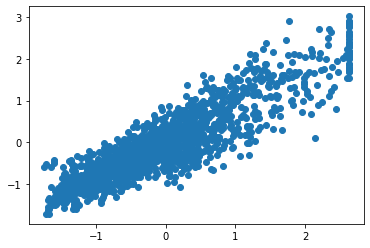

In [124]:
plt.scatter(y_test, y_pred)
plt.show()

### Decision Tree Regression

In [125]:
from sklearn.tree import DecisionTreeRegressor
DTreg = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split=2, random_state =5)

In [126]:
DTreg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=5)

In [127]:
# R square on training data
DTreg.score(X_train, y_train)

0.9035610983404446

In [128]:
# R square on testing data
DTreg.score(X_test, y_test)

0.7944667621861987

In [129]:
#RMSE on Training data
predicted_train=DTreg.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.3097212860298214

In [130]:
#RMSE on Testing data
predicted_test=DTreg.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.456060056209913

In [131]:
#MSE on Testing data
mean_squared_error(y_test,predicted_test)

0.20799077487018902

In [132]:
#MSE on Training data
mean_squared_error(y_train,predicted_train)

0.09592727501996644

In [133]:
# Prediction on Test data
y_pred = DTreg.predict(X_test)

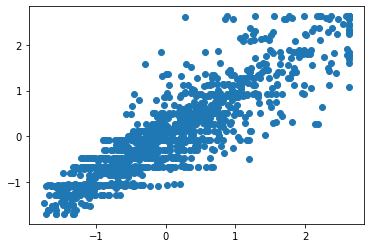

In [134]:
plt.scatter(y_test, y_pred)
plt.show()

### KNN MODEL

In [135]:
from sklearn.neighbors import KNeighborsRegressor

In [136]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.3839835193348884,
 0.26275273512099306,
 0.24380339575648258,
 0.24069631394223534,
 0.2409439300165297,
 0.24097162760936108,
 0.24328240807351775,
 0.24358973830540653,
 0.24649573680220271,
 0.24735415425079732]

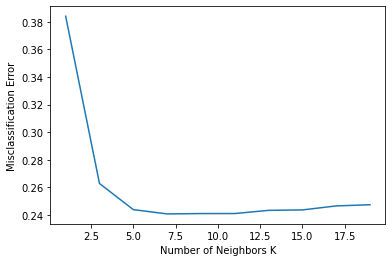

In [137]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [138]:
KNN_model=KNeighborsRegressor(n_neighbors=5)
KNN_model.fit(X_train,y_train)

KNeighborsRegressor()

In [139]:
# R square on training data
KNN_model.score(X_train, y_train)

0.8418569954131861

In [140]:
# R square on testing data
KNN_model.score(X_test, y_test)

0.7561966042435174

In [141]:
#RMSE on Training data
predicted_train=KNN_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.396615715767737

In [142]:
#RMSE on Testing data
predicted_test=KNN_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.4967076853111459

In [143]:
#MSE on Testing data
mean_squared_error(y_test,predicted_test)

0.24671852464715632

In [144]:
#MSE on Training data
mean_squared_error(y_train,predicted_train)

0.15730402599395435

In [145]:
# Prediction on Test data
y_pred = KNN_model.predict(X_test)

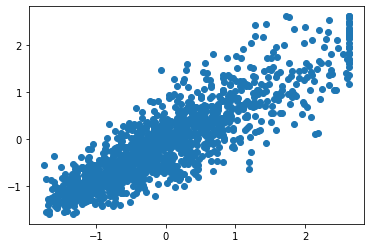

In [146]:
plt.scatter(y_test, y_pred)
plt.show()

### RANDOM FOREST WITH GRIDSEARCH TUNING

In [147]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
param_grid = {
    'max_depth': [7,10],  
    'max_features': [4,6],  
    'min_samples_split': [150,100],  
    'min_samples_leaf': [50,100],  
    'n_estimators': [301,501]}

In [149]:
rf_model = RandomForestRegressor()

In [150]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3)

In [151]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 100],
                         'n_estimators': [301, 501]})

In [152]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 501}

In [153]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=50,
                      min_samples_split=100, n_estimators=501)

In [154]:
best_grid = grid_search.best_estimator_

In [155]:
# R square on training data
best_grid.score(X_train, y_train)

0.8355138432718172

In [156]:
# R square on testing data
best_grid.score(X_test, y_test)

0.8227240552710117

In [157]:
#RMSE on Training data
predicted_train=best_grid.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.40569808296484894

In [158]:
#RMSE on Testing data
predicted_test=best_grid.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.42532319132021573

In [159]:
#MSE on Testing data
mean_squared_error(y_test,predicted_test)

0.18089981707481284

In [160]:
#MSE on Training data
mean_squared_error(y_train,predicted_train)

0.16459093452135345

In [161]:
# Prediction on Test data
y_pred = best_grid.predict(X_test)

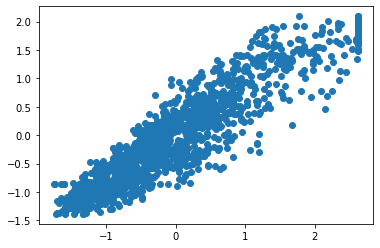

In [162]:
plt.scatter(y_test, y_pred)
plt.show()

### Tuning Linear Regression : Elastic Net

In [177]:
from sklearn.linear_model import ElasticNet

In [184]:
model_enet = ElasticNet(alpha=0.1)
model_enet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [185]:
print ("Elastic net model:", (model_enet.coef_))

Elastic net model: [ 0.          0.12533543  0.13320998  0.16399171  0.04084965  0.55341746
 -0.         -0.00095865  0.          0.         -0.          0.
  0.        ]


In [186]:
print(model_enet)

ElasticNet(alpha=0.1)


In [187]:
model_enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [188]:
# R square on training data
model_enet.score(X_train, y_train)

0.782657230298659

In [189]:
# R square on testing data
model_enet.score(X_test, y_test)

0.7838147589173858

In [190]:
#RMSE on Training data
predicted_train=model_enet.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.464962068497688

In [191]:
#RMSE on Testing data
predicted_test=model_enet.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.4677287065223727

In [192]:
#MSE on Testing data
mean_squared_error(y_test,predicted_test)

0.21877014290509186

In [193]:
#MSE on Training data
mean_squared_error(y_train,predicted_train)

0.21618972514164872

In [194]:
# Prediction on Test data
y_pred = model_enet.predict(X_test)

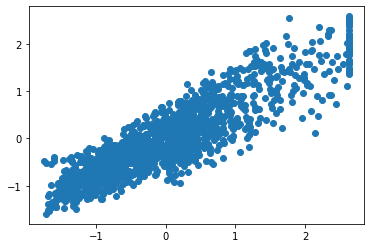

In [195]:
plt.scatter(y_test, y_pred)
plt.show()

### Tuning Linear Regression : Train and Test Split

In [196]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size =0.25, random_state=42)

In [197]:
regression_model2 = LinearRegression()
regression_model2.fit(X_train2, y_train2)

LinearRegression()

In [198]:
for idx, col_name in enumerate(X_train2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[idx]))

The coefficient for const is 0.0
The coefficient for Age is 0.14030190235532985
The coefficient for CustTenure is 0.14893033730258054
The coefficient for MonthlyIncome is 0.11602809740843685
The coefficient for ExistingPolicyTenure is 0.08406018362575748
The coefficient for SumAssured is 0.5884027047859194
The coefficient for Designation_Executive is -0.14443857961220985
The coefficient for Designation_Manager is -0.16226119045745507
The coefficient for Designation_Senior Manager is -0.0849305636714045
The coefficient for MaritalStatus_Divorced is 0.046389803993241364
The coefficient for MaritalStatus_Married is 0.04099336327318664
The coefficient for MaritalStatus_Single is 0.05821351074172723
The coefficient for PaymentMethod_Monthly is 0.018527672456820077


In [199]:
intercept2 = regression_model2.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.000719586094450774


In [200]:
# R square on training data
regression_model2.score(X_train2, y_train2)

0.7987077690546676

In [201]:
# R square on testing data
regression_model2.score(X_test2, y_test2)

0.7927441714530099

In [202]:
#RMSE on Training data
predicted_train2=regression_model2.fit(X_train2, y_train2).predict(X_train2)
np.sqrt(metrics.mean_squared_error(y_train2,predicted_train2))

0.4466896724541436

In [203]:
#RMSE on Testing data
predicted_test2=regression_model2.fit(X_train2, y_train2).predict(X_test2)
np.sqrt(metrics.mean_squared_error(y_test2,predicted_test2))

0.4611822706816003

In [204]:
#MSE on Testing data
mean_squared_error(y_test2,predicted_test2)

0.21268908679103685

In [205]:
#MSE on Training data
mean_squared_error(y_train,predicted_train)

0.21618972514164872

In [206]:
# Prediction on Test data
y_pred2 = regression_model2.predict(X_test2)

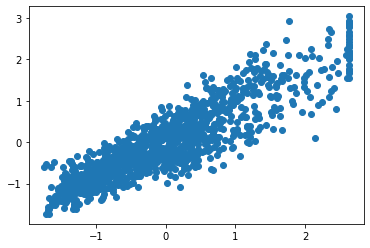

In [207]:
plt.scatter(y_test2, y_pred2)
plt.show()

### Validation

### K Fold Cross Validation for Linear Regression

In [210]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

k = 5 

kf = KFold(n_splits=k, shuffle=True, random_state=42) 

mse_scores = []

for train_index, test_index in kf.split(X):
    X_traink, X_testk = X.values[train_index], X.values[test_index]
    y_traink, y_testk = y.values[train_index], y.values[test_index]

    # Fit the model to the training data
    regression_model.fit(X_traink, y_traink)

    # Make predictions on the test data
    y_predk = regression_model.predict(X_testk)

    # Calculate the mean squared error (MSE) for this fold
    mse = mean_squared_error(y_testk, y_predk)
    mse_scores.append(mse)

# Print the mean squared error for each fold
for fold, mse in enumerate(mse_scores, 1):
    print(f"Fold {fold}: Mean Squared Error = {mse:.4f}")

# Calculate and print the average MSE across all folds
avg_mse = np.mean(mse_scores)
print(f"Average Mean Squared Error: {avg_mse:.4f}")

Fold 1: Mean Squared Error = 0.2056
Fold 2: Mean Squared Error = 0.2095
Fold 3: Mean Squared Error = 0.2060
Fold 4: Mean Squared Error = 0.2067
Fold 5: Mean Squared Error = 0.1925
Average Mean Squared Error: 0.2041


### K Fold Cross Validation for Decision Tree Regression

In [215]:
k = 5 

kf = KFold(n_splits=k, shuffle=True, random_state=42) 

mse_scores = []

for train_index, test_index in kf.split(X):
    X_traink, X_testk = X.values[train_index], X.values[test_index]
    y_traink, y_testk = y.values[train_index], y.values[test_index]

    # Fit the model to the training data
    DTreg.fit(X_traink, y_traink)

    # Make predictions on the test data
    y_predk = DTreg.predict(X_testk)

    # Calculate the mean squared error (MSE) for this fold
    mse = mean_squared_error(y_testk, y_predk)
    mse_scores.append(mse)

# Print the mean squared error for each fold
for fold, mse in enumerate(mse_scores, 1):
    print(f"Fold {fold}: Mean Squared Error = {mse:.4f}")

# Calculate and print the average MSE across all folds
avg_mse = np.mean(mse_scores)
print(f"Average Mean Squared Error: {avg_mse:.4f}")

Fold 1: Mean Squared Error = 0.1929
Fold 2: Mean Squared Error = 0.1786
Fold 3: Mean Squared Error = 0.1867
Fold 4: Mean Squared Error = 0.2024
Fold 5: Mean Squared Error = 0.1655
Average Mean Squared Error: 0.1852


### K Fold Cross Validation for KNN Regression

In [212]:
k = 5 

kf = KFold(n_splits=k, shuffle=True, random_state=42) 

mse_scores = []

for train_index, test_index in kf.split(X):
    X_traink, X_testk = X.values[train_index], X.values[test_index]
    y_traink, y_testk = y.values[train_index], y.values[test_index]

    # Fit the model to the training data
    KNN_model.fit(X_traink, y_traink)

    # Make predictions on the test data
    y_predk = KNN_model.predict(X_testk)

    # Calculate the mean squared error (MSE) for this fold
    mse = mean_squared_error(y_testk, y_predk)
    mse_scores.append(mse)

# Print the mean squared error for each fold
for fold, mse in enumerate(mse_scores, 1):
    print(f"Fold {fold}: Mean Squared Error = {mse:.4f}")

# Calculate and print the average MSE across all folds
avg_mse = np.mean(mse_scores)
print(f"Average Mean Squared Error: {avg_mse:.4f}")

Fold 1: Mean Squared Error = 0.2234
Fold 2: Mean Squared Error = 0.2403
Fold 3: Mean Squared Error = 0.2370
Fold 4: Mean Squared Error = 0.2431
Fold 5: Mean Squared Error = 0.2270
Average Mean Squared Error: 0.2342


### K Fold Cross Validation for Random Forest Regression

In [213]:
k = 5 

kf = KFold(n_splits=k, shuffle=True, random_state=42) 

mse_scores = []

for train_index, test_index in kf.split(X):
    X_traink, X_testk = X.values[train_index], X.values[test_index]
    y_traink, y_testk = y.values[train_index], y.values[test_index]

    # Fit the model to the training data
    best_grid.fit(X_traink, y_traink)

    # Make predictions on the test data
    y_predk = best_grid.predict(X_testk)

    # Calculate the mean squared error (MSE) for this fold
    mse = mean_squared_error(y_testk, y_predk)
    mse_scores.append(mse)

# Print the mean squared error for each fold
for fold, mse in enumerate(mse_scores, 1):
    print(f"Fold {fold}: Mean Squared Error = {mse:.4f}")

# Calculate and print the average MSE across all folds
avg_mse = np.mean(mse_scores)
print(f"Average Mean Squared Error: {avg_mse:.4f}")

Fold 1: Mean Squared Error = 0.1701
Fold 2: Mean Squared Error = 0.1816
Fold 3: Mean Squared Error = 0.1774
Fold 4: Mean Squared Error = 0.1796
Fold 5: Mean Squared Error = 0.1642
Average Mean Squared Error: 0.1746
